# JUST SOME NOTES FOR MYSELF
## Model Evaluate 
* t-SNE plot with clusters 
* Cluster Cardinality
* Cluster Magnitide
* Cardinality vs Magntiude plot (Undone but MUST IMPLEMENT AH)
    - Clusters with a higher cardinality tend to also have a higher cluster magnitude. The idea is that normal clusters lie on or are very close to the 45-degree line. [Reference](https://towardsdatascience.com/common-mistakes-in-cluster-analysis-and-how-to-avoid-them-eb960116d773)

## Find outimal k-value
* t-SNE plot at optimal perplexity (just see number of clusters eye power)
* Knee plot
* shilotee score

## Model Interpretation
* display the cluster characteristics with a radar chart
* calculate the mean values of each feature table format
    * Expand to chart 

# Project initialization
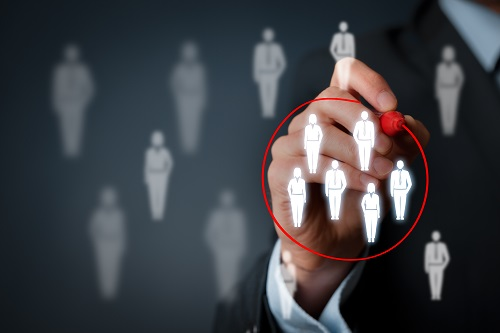
## Background

As a HR manager, you want to understand your employees so that appropriate 
direction can be given to the management to satisfy and retain the employees.


## Problem Statement 

The main goal is to segment different types of Employees based on attributes like their age, job scope,salary etc and answer the following questions. 

* **What are the characteristics of each employee cluster**
  * Due to these characteristics, what are the main needs of each cluster

*   **Which group of employee is the most vulnerable that the management should do something to retain them.** 



## Keywords
- Unsupervised Learning
- K-Means Clustering
- Silhouette Analysis
- Hierarchical Clustering
- DBSCAN
- t-SNE
- Clusters Interpretation

## Import libraries

In [1]:
from typing import Sequence, Tuple
from itertools import combinations, chain
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sklearn
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering,DBSCAN, OPTICS
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
import warnings # Statsmodels likes to throw out warnings. Some of them are important, some are not

# Graphing
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objs as go
from plotly import tools

## EDA
import phik
from phik import resources, report


## Import Dataset

In [2]:
df_raw = pd.read_csv('../Data/Company_Employee.csv')
df_raw

Age  Gender     BusinessTravel            Job Function  \
0      41  Female      Travel_Rarely                   Sales   
1      49    Male  Travel_Frequently  Research & Development   
2      37    Male      Travel_Rarely  Research & Development   
3      33  Female  Travel_Frequently  Research & Development   
4      27    Male      Travel_Rarely  Research & Development   
...   ...     ...                ...                     ...   
1465   36    Male  Travel_Frequently  Research & Development   
1466   39    Male      Travel_Rarely  Research & Development   
1467   27    Male      Travel_Rarely  Research & Development   
1468   49    Male  Travel_Frequently                   Sales   
1469   34    Male      Travel_Rarely  Research & Development   

      Distance Between Company and Home (KM)  \
0                                          1   
1                                          8   
2                                          2   
3                                          3   
4                                          2   
...                                      ...   
1465                                      23   
1466                                       6   
1467                                       4   
1468                                       2   
1469                                       8   

      Education (1 is lowest, 5 is highest)  \
0                                         2   
1                                         1   
2                                         2   
3                                         4   
4                                         1   
...                                     ...   
1465                                      2   
1466                                      1   
1467                                      3   
1468                                      3   
1469                                      3   

      Job Satisfaction (1 is lowest, 4 is highest) MaritalStatus  Salary ($)  \
0                                                4        Single        5993   
1                                                2       Married        5130   
2                                                3        Single        2090   
3                                                3       Married        2909   
4                                                2       Married        3468   
...                                            ...           ...         ...   
1465                                             4       Married        2571   
1466                                             1       Married        9991   
1467                                             2       Married        6142   
1468                                             2       Married        5390   
1469                                             3       Married        4404   

      Performance Rating (1 is lowest, 4 is highest)  \
0                                                  3   
1                                                  4   
2                                                  3   
3                                                  3   
4                                                  3   
...                                              ...   
1465                                               3   
1466                                               3   
1467                                               4   
1468                                               3   
1469                                               3   

      Work Life Balance (1 is worst, 4 is best)  Length of Service (Years)  \
0                                             1                          6   
1                                             3                         10   
2                                             3                          0   
3                                             3                          8   
4                                             3                        

### <h2>Metadata</h2>

| Attribute | Description | Type |
|---|---|---|
| Age | Employee age | Discrete |
| Gender | Employee gender | Categorical-Nominal |
| BusinessTravel:  | Customer's age | Numerical-Continuous |
| Job Function: | Department of the employee denominated in thousands | Discrete |
| Distance Between Company and Home (KM): | distance between company and home | Numerical-Continuous |
| Education  | (1 is lowest, 5 is highest): Education qualification of employee | Numerical-Continuous |
| Job Satisfaction | (1 is lowest, 4 is highest): Employee's job satisfaction | Numerical-Continuous |
| MaritalStatus:  | Marital status of employee | Discrete |
| Salary  | Employee's salary in $ | Numerical-Continuous |
| Performance Rating |   (1 is lowest, 4 is highest): Employee's performance rating in the company | Discrete |
| Work Life Balance |  (1 is worst, 4 is best): Work life balance rating| Numerical-Continuous |
| Length of Service (Years): |  How many years the employee works for the company| Numerical-Continuous |
| Resign Status: |  Is the employee still with the company| Discrete |

<link href='styles.css' rel='stylesheet'>
<!--bootstrap-->
<link href="https://cdn.jsdelivr.net/npm/bootstrap@5.0.2/dist/css/bootstrap.min.css" rel="stylesheet" integrity="sha384-EVSTQN3/azprG1Anm3QDgpJLIm9Nao0Yz1ztcQTwFspd3yD65VohhpuuCOmLASjC" crossorigin="anonymous">

## Feature Renaming 

The current feature names are extremely descriptive, for simplicity I'll be shorterning the feature names for easier understanding

In [3]:
# Remove Explanation in features
df_raw.rename(columns = {
    "Distance Between Company and Home (KM)" : "Distance",
    "Education (1 is lowest, 5 is highest)" : "Education",
    "Job Satisfaction (1 is lowest, 4 is highest)" : "Job_Satisfaction",
    "Salary ($)" : "Salary",
    "Performance Rating (1 is lowest, 4 is highest)" : "Performance_Rating",
    "Work Life Balance (1 is worst, 4 is best)" : "Work_Life_Balance",
    "Length of Service (Years)" : "Service_Years"
}, inplace = True)

In [4]:
df_raw.Gender = df_raw.Gender.astype('category') # Turns Gender to category dtype

df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 1470 non-null   int64   
 1   Gender              1470 non-null   category
 2   BusinessTravel      1470 non-null   object  
 3   Job Function        1470 non-null   object  
 4   Distance            1470 non-null   int64   
 5   Education           1470 non-null   int64   
 6   Job_Satisfaction    1470 non-null   int64   
 7   MaritalStatus       1470 non-null   object  
 8   Salary              1470 non-null   int64   
 9   Performance_Rating  1470 non-null   int64   
 10  Work_Life_Balance   1470 non-null   int64   
 11  Service_Years       1470 non-null   int64   
 12  Resign Status       1470 non-null   object  
dtypes: category(1), int64(8), object(4)
memory usage: 139.5+ KB


# EDA

A good data science project starts from understanding our data. With that, I aim to explore deeper on the following aspects: 

* How many observations are there in the data?
* Are there any errors or missing values in the data?
*  Univariative Analysis
*  Correlation between Features
*  Cardinality of Features

---

To prevent the mutation of our original data, we will make a copy of our data to perform eda on it.



In [5]:
df_eda = df_raw.copy()

## How many observations in dataset

In [6]:
rows, cols = df_eda.shape
print("There are {} rows and {} features in the data.".format(rows, cols))

There are 1470 rows and 13 features in the data.


## Descriptive Statstics

In [7]:
df_eda.describe().T

count         mean          std     min     25%     50%  \
Age                 1470.0    36.923810     9.135373    18.0    30.0    36.0   
Distance            1470.0     9.192517     8.106864     1.0     2.0     7.0   
Education           1470.0     2.912925     1.024165     1.0     2.0     3.0   
Job_Satisfaction    1470.0     2.728571     1.102846     1.0     2.0     3.0   
Salary              1470.0  6502.931293  4707.956783  1009.0  2911.0  4919.0   
Performance_Rating  1470.0     3.153741     0.360824     3.0     3.0     3.0   
Work_Life_Balance   1470.0     2.761224     0.706476     1.0     2.0     3.0   
Service_Years       1470.0     7.008163     6.126525     0.0     3.0     5.0   

                       75%      max  
Age                   43.0     60.0  
Distance              14.0     29.0  
Education              4.0      5.0  
Job_Satisfaction       4.0      4.0  
Salary              8379.0  19999.0  
Performance_Rating     3.0      4.0  
Work_Life_Balance      3.0      4.0  
Service_Years          9.0     40.0

Observations:
* The means varies across features. For example:
    1. Salary mean of 6500
    2. Age mean of 36
* Standard Deviation varies across features.For example:
    1. Salary Std 4.7k
    2. Age std 9

Conclusion:
Might consider standardizing features in data preprocessing

## Cardinality of Categorical Features

In [8]:
# Extract cardinality of categorical variables 
df_eda.select_dtypes(include=['category','object']).describe().T

count unique                     top  freq
Gender          1470      2                    Male   882
BusinessTravel  1470      3           Travel_Rarely  1043
Job Function    1470      3  Research & Development   961
MaritalStatus   1470      3                 Married   673
Resign Status   1470      2                      No  1233

Observation:

All categorical features have low cardinality

Conclusion:
* Able to one-hot-encode without worrying about increasing dimensionality significantly 
* All features can be easily interpretable for analysis

## Univariative Analysis: distribution of all numeric features

Since we are working are going to work with k-means algorithm, that uses elducian distance, we have to check all if features follow what kind of distribution to perform approitate normalization in the Data preprocessing sections

In [9]:
df_eda_num = df_eda.select_dtypes(include=['int64', 'float64'])

numeric_features = df_eda_num.columns
# Extract out number of features
print("Number of Quantitative features: {}".format(len(numeric_features)))

Number of Quantitative features: 8


In [10]:
from plotly.subplots import make_subplots

import plotly.figure_factory as ff
import plotly.express as px
import plotly.graph_objects as go


# Plot distribution of each numerical feature
#Extract all numeric features
df_eda_num = df_eda.select_dtypes(include=['int64', 'float64'])

numeric_features = df_eda_num.columns
print(len(numeric_features))
fig = make_subplots(rows=len(numeric_features), cols=1)
for idx,feature in enumerate(numeric_features):
    fig.append_trace(go.Histogram(x=df_eda_num[feature], name=feature), row=idx+1, col=1)
    # add suptitle
    fig.update_xaxes(title_text=feature, row=idx+1, col=1)
    # Increase height of subplot

fig.update_layout(height=1200, width=800, title_text='Distribution of Numerical Features')
fig.show()



8


Observations:

* Age follows a Gaussian distribution
* Distance, Salary and Service Years is positively skewed
* Education, Job_Satisfcation ,Performance_Rating,Work_life_balance seems to 
* Performance_rating two unique values

Conclusion:

* Log transform and scale to [0,1] for Distance Salary and Service Years
* Normalize and scale to [0-1] for Age

Basically say which one gasuaiian (normal) distribution that can just normalize normally, if like skweewd must other method already 


Check whether size follows a power-law, Poisson, or Gaussian distribution.

* Power-law: Log transform and scale to [0,1].
* Poisson: Create quantiles and scale to [0,1].
* Gaussian: Normalize and scale to [0,1].

GO COMPLETE AH OI

## Pairplot

* Is there an identifiable cluster by glancing through the datapoints?
* Is there a significant difference of the Spending Behaviour across different gender?
* Is there a need to remove/create certain features to reduce ambiguity for the clustering?

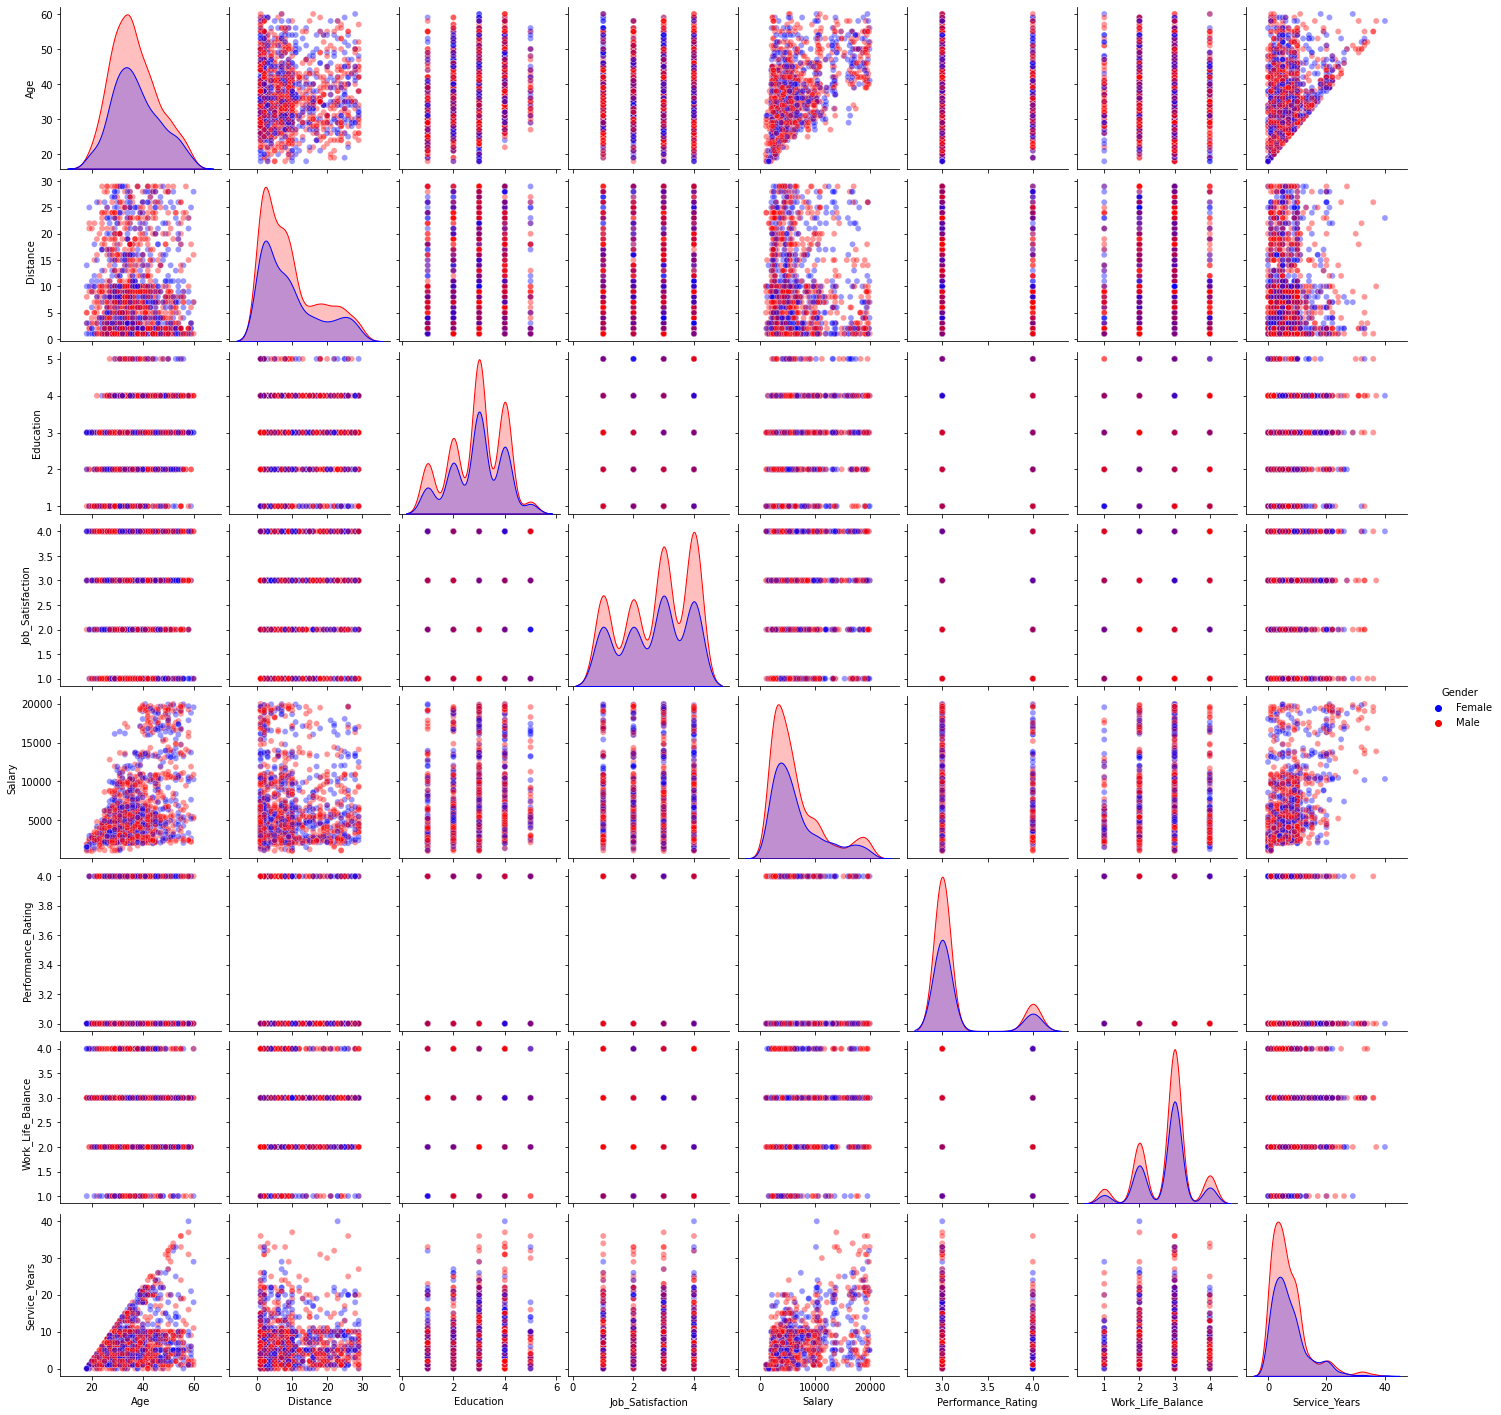

In [11]:
sns.pairplot(df_eda, hue = 'Gender', palette=['b', 'r'], plot_kws=dict(alpha=0.4))
plt.show()

## Bi-variate Analysis -Phik correlation 𝜙k

We will be using Phik correlation (𝜙k)  is the latest relatively new correlation metric that is based on several refinements to Pearson’s χ2 (chi-squared) contingency test

* What are the features highly correlated to Resign Status?
* Are there any two features that are very highly correlated to each other?

In [12]:
df_eda.phik_matrix()

interval columns not set, guessing: ['Age', 'Distance', 'Education', 'Job_Satisfaction', 'Salary', 'Performance_Rating', 'Work_Life_Balance', 'Service_Years']


Age    Gender  BusinessTravel  Job Function  \
Age                 1.000000  0.000000        0.069800      0.000000   
Gender              0.000000  1.000000        0.022402      0.015435   
BusinessTravel      0.069800  0.022402        1.000000      0.000000   
Job Function        0.000000  0.015435        0.000000      1.000000   
Distance            0.000000  0.034159        0.042961      0.000000   
Education           0.352040  0.000000        0.000000      0.000000   
Job_Satisfaction    0.000000  0.000000        0.000000      0.031204   
MaritalStatus       0.231465  0.019555        0.115345      0.100830   
Salary              0.542212  0.059711        0.043209      0.299377   
Performance_Rating  0.000000  0.000000        0.000000      0.000000   
Work_Life_Balance   0.055496  0.000000        0.000000      0.050038   
Service_Years       0.560431  0.051930        0.000000      0.056353   
Resign Status       0.278172  0.014016        0.074137      0.046641   

                    Distance  Education  Job_Satisfaction  MaritalStatus  \
Age                 0.000000   0.352040          0.000000       0.231465   
Gender              0.034159   0.000000          0.000000       0.019555   
BusinessTravel      0.042961   0.000000          0.000000       0.115345   
Job Function        0.000000   0.000000          0.031204       0.100830   
Distance            1.000000   0.000000          0.000000       0.000000   
Education           0.000000   1.000000          0.018766       0.000000   
Job_Satisfaction    0.000000   0.018766          1.000000       0.000000   
MaritalStatus       0.000000   0.000000          0.000000       1.000000   
Salary              0.108462   0.221059          0.000000       0.101592   
Performance_Rating  0.072127   0.000000          0.039723       0.000000   
Work_Life_Balance   0.000000   0.000000          0.000000       0.000000   
Service_Years       0.000000   0.174985          0.000000       0.095044   
Resign Status       0.089419   0.000000          0.150024       0.104779   

                      Salary  Performance_Rating  Work_Life_Balance  \
Age                 0.542212            0.000000           0.055496   
Gender              0.059711            0.000000           0.000000   
BusinessTravel      0.043209            0.000000           0.000000   
Job Function        0.299377            0.000000           0.050038   
Distance            0.108462            0.072127           0.000000   
Education           0.221059            0.000000           0.000000   
Job_Satisfaction    0.000000            0.039723           0.000000   
MaritalStatus       0.101592            0.000000           0.000000   
Salary              1.000000            0.000000           0.000000   
Performance_Rating  0.000000            1.000000           0.000000   
Work_Life_Balance   0.000000            0.000000           1.000000   
Service_Years       0.610329            0.000000           0.000000   
Resign Status       0.280586            0.000000           0.143809   

                    Service_Years  Resign Status  
Age                      0.560431       0.278172  
Gender                   0.051930       0.014016  
BusinessTravel           0.000000       0.074137  
Job Function             0.056353       0.046641  
Distance                 0.000000       0.089419  
Education                0.174985       0.000000  
Job_Satisfaction         0.000000       0.150024  
MaritalStatus            0.095044       0.104779  
Salary                   0.610329       0.280586  
Performance_Rating       0.000000       0.000000  
Work_Life_Balance        0.000000       0.143809  
Service_Years            1.000000       0.232555  
Resign Status            0.232555       1.000000

interval columns not set, guessing: ['Age', 'Distance', 'Education', 'Job_Satisfaction', 'Salary', 'Performance_Rating', 'Work_Life_Balance', 'Service_Years']


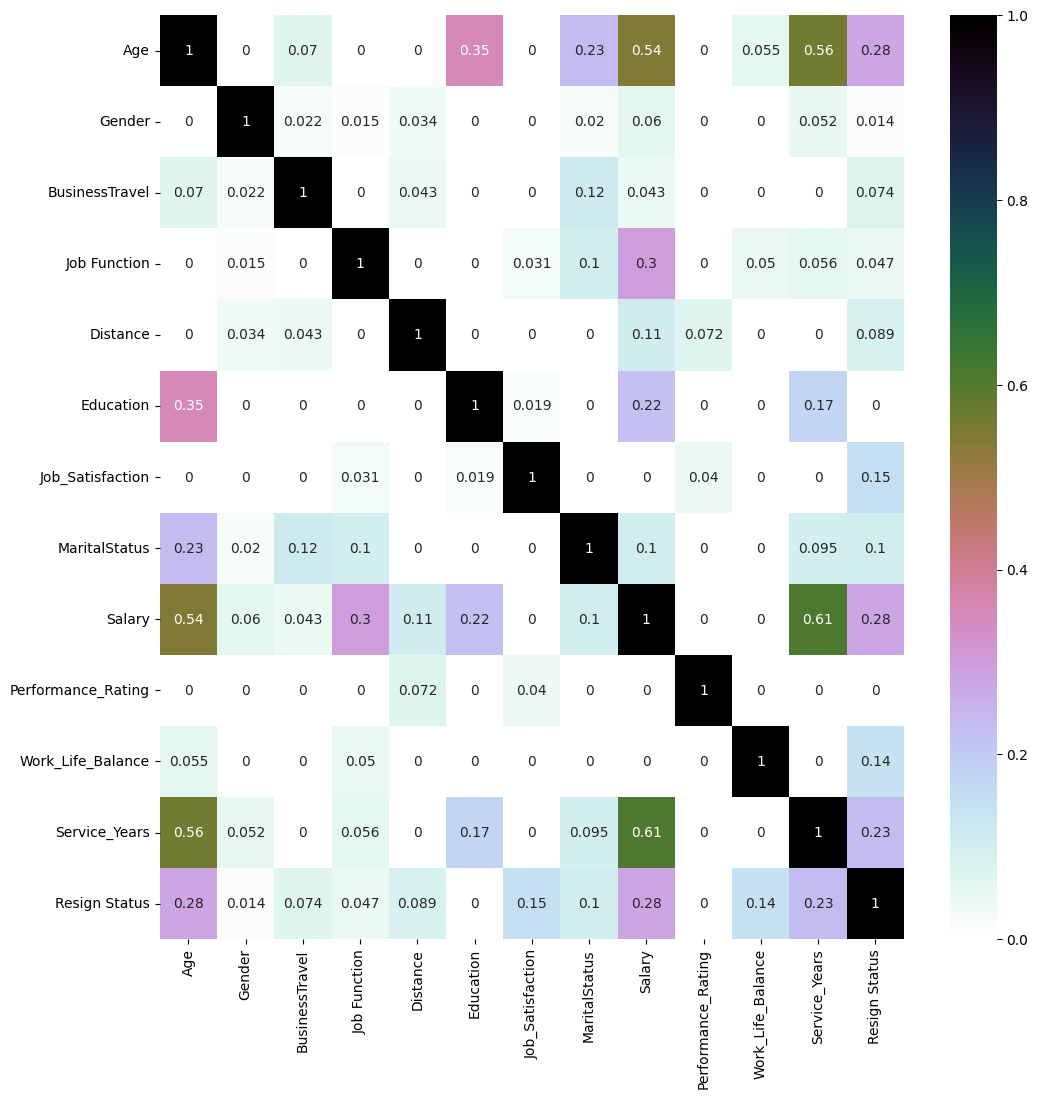

In [13]:
plt.figure(figsize=(12,12))
sns.heatmap(
    df_eda.phik_matrix(),
    cmap="cubehelix_r",
    annot = True)
plt.show()

Observations:
* `Gender`, `BusinessTrabel`, `Job Function`, `Distance`, `Education` and `Performace Rating` has extremely low correlation to Resign Status
* `Service Years` is highly correlated to `Age` and `Salary` which logically makes sence

Conclusion:
1. Attempt to drop features that has low correlation to Resign Status
2. Keep Salary,Service years and Resign Status for now

## Since we are only interested figuring out which clusters of emplyoees 
Focusing of Resign Status, the least correlated features to Resign Status are `Gender`,`Job Function`,`Disatance`, `Education`

## Univaritive Analysis across Resign Status 

In [14]:
df_eda.head()

Age  Gender     BusinessTravel            Job Function  Distance  \
0   41  Female      Travel_Rarely                   Sales         1   
1   49    Male  Travel_Frequently  Research & Development         8   
2   37    Male      Travel_Rarely  Research & Development         2   
3   33  Female  Travel_Frequently  Research & Development         3   
4   27    Male      Travel_Rarely  Research & Development         2   

   Education  Job_Satisfaction MaritalStatus  Salary  Performance_Rating  \
0          2                 4        Single    5993                   3   
1          1                 2       Married    5130                   4   
2          2                 3        Single    2090                   3   
3          4                 3       Married    2909                   3   
4          1                 2       Married    3468                   3   

   Work_Life_Balance  Service_Years Resign Status  
0                  1              6           Yes  
1                  3             10            No  
2                  3              0           Yes  
3                  3              8            No  
4                  3              2            No

In [15]:
df_eda.columns

Index(['Age', 'Gender', 'BusinessTravel', 'Job Function', 'Distance',
       'Education', 'Job_Satisfaction', 'MaritalStatus', 'Salary',
       'Performance_Rating', 'Work_Life_Balance', 'Service_Years',
       'Resign Status'],
      dtype='object')

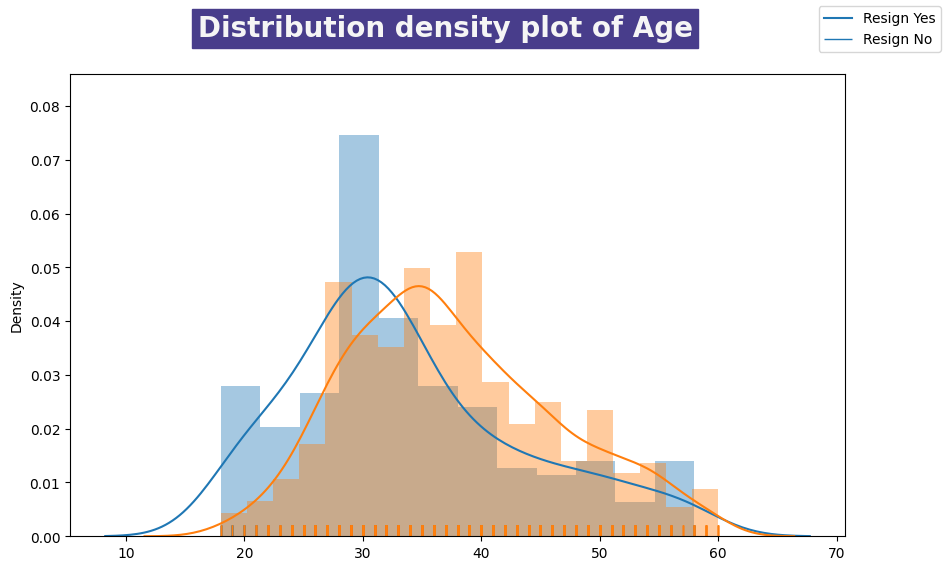

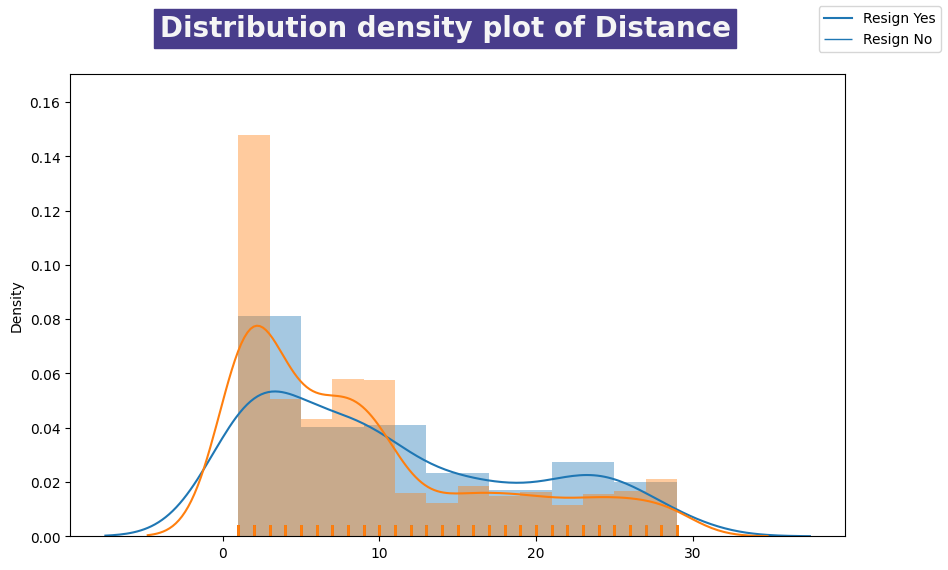

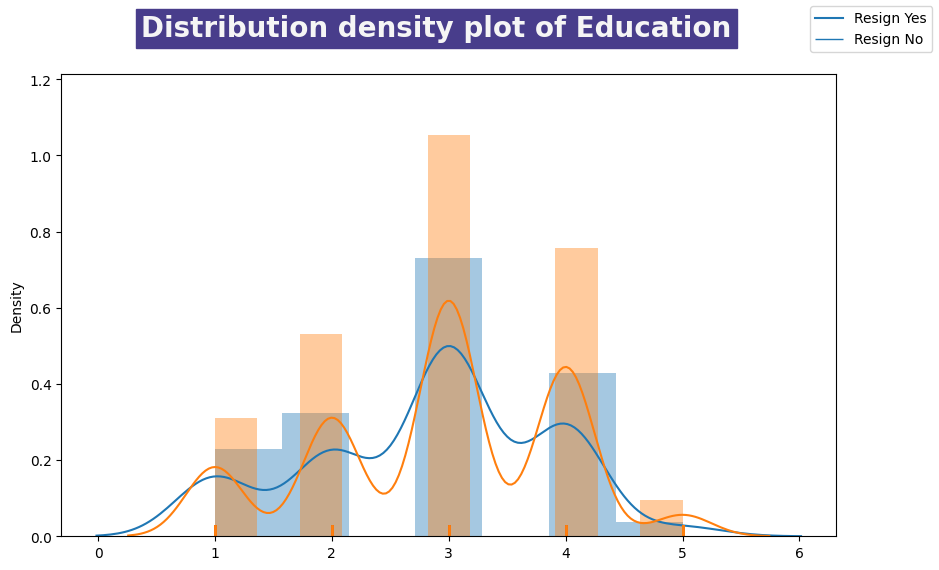

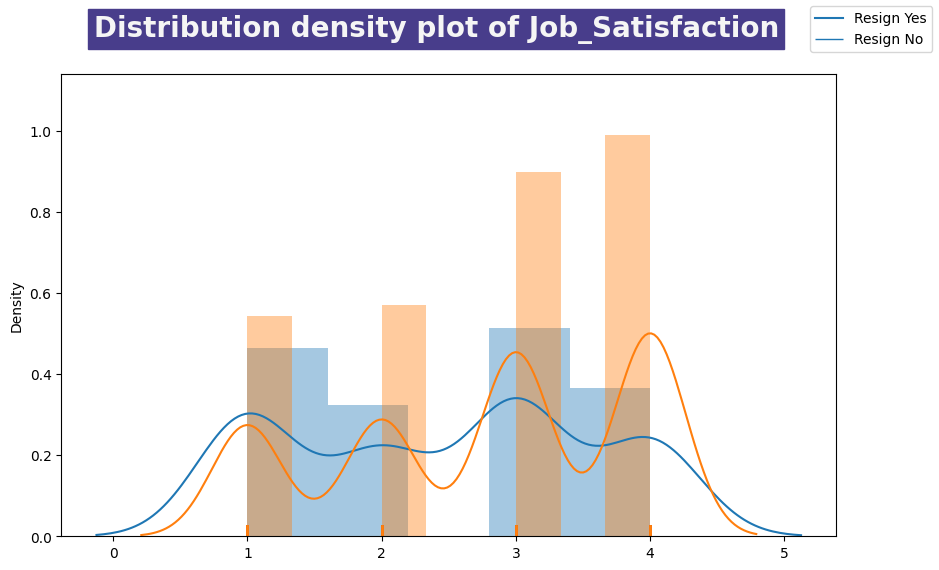

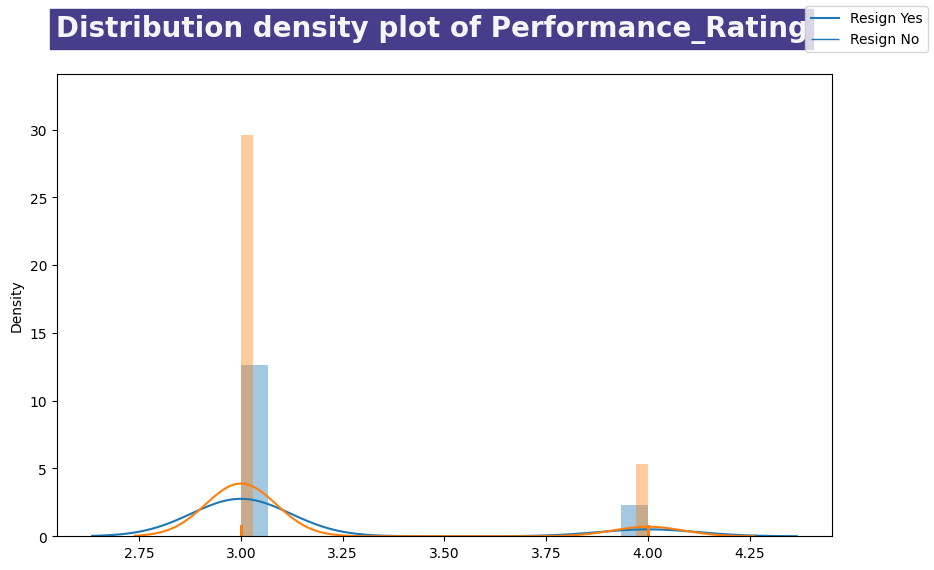

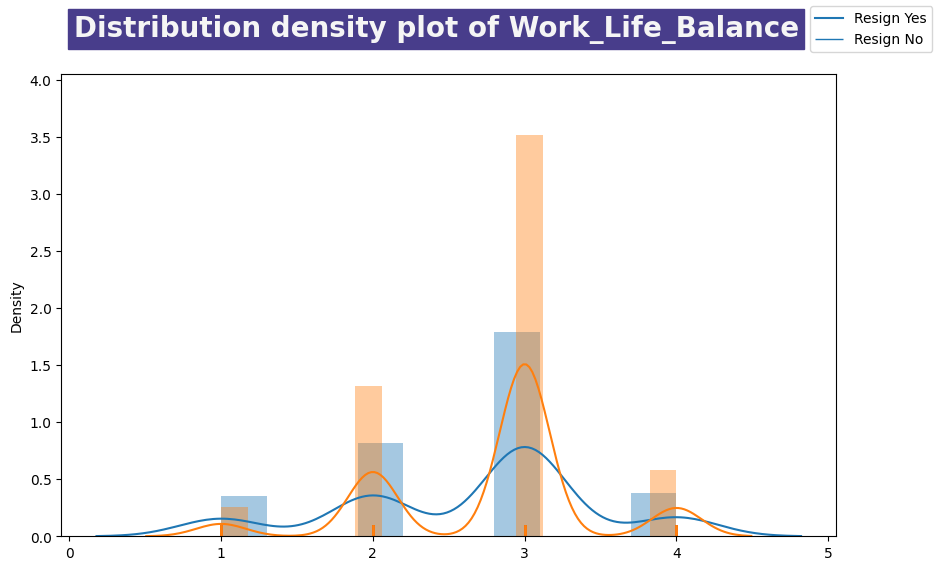

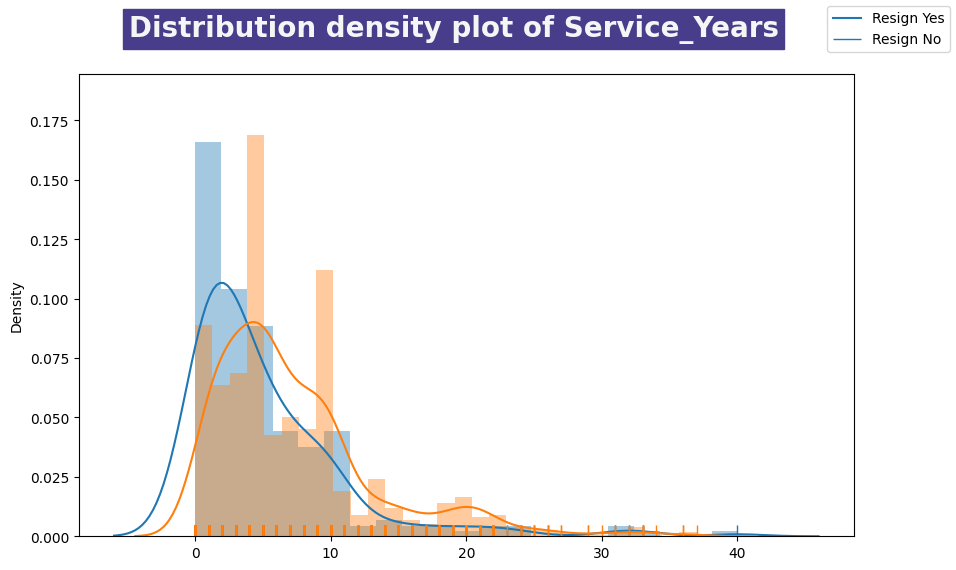

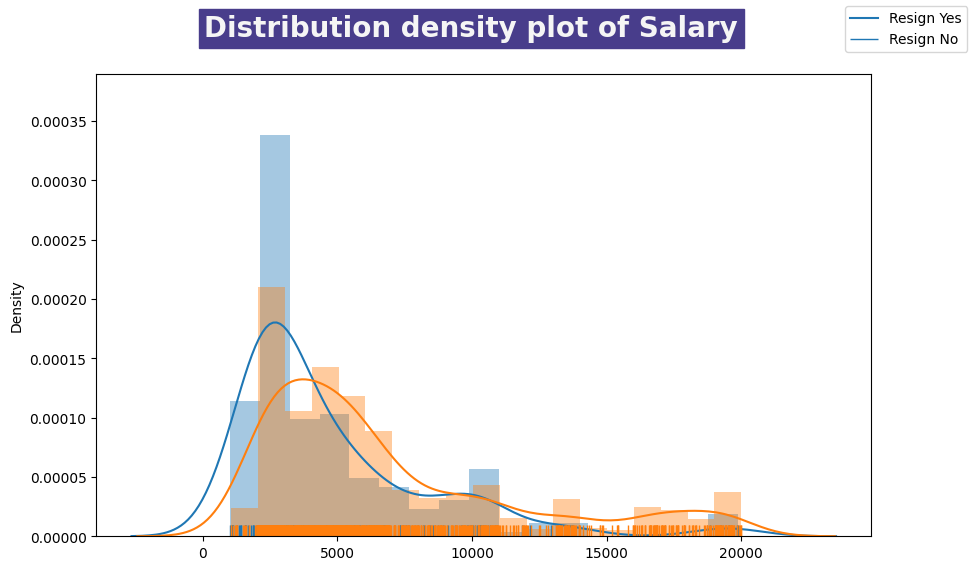

In [16]:
df_eda_resign = df_eda[df_eda['Resign Status']=='Yes']
df_eda_normal = df_eda[df_eda['Resign Status']=='No']

# df_eda_melt = df_eda.melt(['Machine Status'],value_vars=['Ambient T (C)', 'Process T (C)', 'Rotation Speed (rpm)','Torque (Nm)'], var_name='cols',  value_name='vals')

features = ['Age','Distance','Education', 'Job_Satisfaction','Performance_Rating', 'Work_Life_Balance', 'Service_Years', 'Salary']	

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for i in features:
      fig = plt.figure(figsize=(10,6))
      sns.distplot(df_eda_resign[[i]], hist=True, rug=True)
      sns.distplot(df_eda_normal[[i]], hist=True, rug=True)

      fig.suptitle(f'Distribution density plot of {i}',color='whitesmoke',weight='bold',size=20, backgroundcolor= 'darkslateblue')

      fig.legend(labels=['Resign Yes','Resign No'])
      plt.show()

Observations:

* Age follows a gaussian distribution
* Service Year seems to be very positively skewed
* 

# Feature Processing

Centroid-based Clustering models like K-means algorithm assumes the following

* Symmetric distribution of variables (not skewed)
* Variables with same average values
* Variables with same variance

This is because under the hood, k-means algorithm uses Euclidean distance to measure the similarities between objects

Hence we need to process our data to fit those assumptions

---
Workflow:
1. De-skew 
2. Scale features to [0-1] using min max scalar
3. Ordinal Encode `BusinessTravel`
4. One-Hot-Encode the rest of categorical features

In [17]:
df = df_raw.copy()

### Utility function to Visulize preprocessed dataset

In [18]:
# Plot distribution of each numerical feature

def plot_distribution(df, features,title):
    '''
    Plots the distribution of each feature in the choosen dataframe.
    '''
    fig = make_subplots(rows=len(features), cols=1)
    for idx,feature in enumerate(features):
        fig.append_trace(go.Histogram(x=df[feature], name=feature), row=idx+1, col=1)
        # add suptitle
        fig.update_xaxes(title_text=feature, row=idx+1, col=1)
        # Increase height of subplot
    fig.update_layout(height=1200, width=800, title_text=title)
    fig.show()

## Encoding Categorical Variables

Convert the categorical features to its numeric representation for

In [19]:
# Label Encode Ordinal Feature Business Travel
from sklearn.preprocessing import LabelEncoder
encoded = LabelEncoder()
encoded.fit([
        ['Non-Travel'],
        ['Travel_Rarely'],
        ['Travel_Frequently']
    ])

df['BusinessTravel'] = encoded.transform(df_raw['BusinessTravel'])

display(df['BusinessTravel'])

c:\Users\Kaleb Nim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



0       2
1       1
2       2
3       1
4       2
       ..
1465    1
1466    2
1467    2
1468    1
1469    2
Name: BusinessTravel, Length: 1470, dtype: int32

In [20]:
# One-hot encode Categorical Features
df_onehot = pd.get_dummies(df, drop_first=True)
df_onehot.head()

Age  BusinessTravel  Distance  Education  Job_Satisfaction  Salary  \
0   41               2         1          2                 4    5993   
1   49               1         8          1                 2    5130   
2   37               2         2          2                 3    2090   
3   33               1         3          4                 3    2909   
4   27               2         2          1                 2    3468   

   Performance_Rating  Work_Life_Balance  Service_Years  Gender_Male  \
0                   3                  1              6            0   
1                   4                  3             10            1   
2                   3                  3              0            1   
3                   3                  3              8            0   
4                   3                  3              2            1   

   Job Function_Research & Development  Job Function_Sales  \
0                                    0                   1   
1                                    1                   0   
2                                    1                   0   
3                                    1                   0   
4                                    1                   0   

   MaritalStatus_Married  MaritalStatus_Single  Resign Status_Yes  
0                      0                     1                  1  
1                      1                     0                  0  
2                      0                     1                  1  
3                      1                     0                  0  
4                      1                     0                  0

## Normalize Data

Use QuantileTransformer to transform positively skewed features `Distance`, `Salary`, `Service_Years` to Gassuian distribution

In [21]:
# Log Transform Distance, Salary, Service Years
from sklearn.preprocessing import QuantileTransformer
df_deskewd = df_onehot.copy()
transform_features = ['Distance', 'Salary', 'Service_Years']

quantile_transformer = QuantileTransformer(output_distribution='normal',random_state=0)
df_deskewd[transform_features] = quantile_transformer.fit_transform(df_onehot[transform_features])


In [22]:
plot_distribution(df_deskewd, transform_features, 'Distribution of heavily positively skewed Features')

## Scaling 

K-means clustering is "isotropic" in all directions of space and therefore tends to produce more or less round (rather than elongated) clusters. Therefore, leaving variances unequal is equivalent to putting more weight on variables with smaller variance, so clusters will tend to be separated along variables with greater variance.
[Reference](https://stats.stackexchange.com/questions/21222/are-mean-normalization-and-feature-scaling-needed-for-k-means-clustering)

Transform data to range [0-1]

In [23]:
df_deskewd_scaled = df_deskewd.copy()

numeric_features = df_deskewd_scaled.select_dtypes(include=['int64', 'float64','int32']).columns
min_max_scaler = MinMaxScaler()

df_deskewd_scaled[numeric_features] = min_max_scaler.fit_transform(df_deskewd[numeric_features])
df_deskewd_scaled

Age  BusinessTravel  Distance  Education  Job_Satisfaction  \
0     0.547619             1.0  0.000000       0.25          1.000000   
1     0.738095             0.5  0.513192       0.00          0.333333   
2     0.452381             1.0  0.423517       0.25          0.666667   
3     0.357143             0.5  0.453217       0.75          0.666667   
4     0.214286             1.0  0.423517       0.00          0.333333   
...        ...             ...       ...        ...               ...   
1465  0.428571             0.5  0.621026       0.25          1.000000   
1466  0.500000             1.0  0.487903       0.00          0.000000   
1467  0.214286             1.0  0.466520       0.50          0.333333   
1468  0.738095             0.5  0.423517       0.50          0.333333   
1469  0.380952             1.0  0.513192       0.50          0.666667   

        Salary  Performance_Rating  Work_Life_Balance  Service_Years  \
0     0.529609                 0.0           0.000000       0.512948   
1     0.505671                 1.0           0.666667       0.578150   
2     0.338805                 0.0           0.666667       0.000000   
3     0.434863                 0.0           0.666667       0.541819   
4     0.454264                 0.0           0.666667       0.415288   
...        ...                 ...                ...            ...   
1465  0.408309                 0.0           0.666667       0.490696   
1466  0.583717                 0.0           0.666667       0.526889   
1467  0.532074                 1.0           0.666667       0.512948   
1468  0.514597                 0.0           0.333333       0.557117   
1469  0.482665                 0.0           1.000000       0.464719   

      Gender_Male  Job Function_Research & Development  Job Function_Sales  \
0               0                                    0                   1   
1               1                                    1                   0   
2               1                                    1                   0   
3               0                                    1                   0   
4               1                                    1                   0   
...           ...                                  ...                 ...   
1465            1                                    1                   0   
1466            1                                    1                   0   
1467            1                                    1                   0   
1468            1                                    0                   1   
1469            1                                    1                   0   

      MaritalStatus_Married  MaritalStatus_Single  Resign Status_Yes  
0                         0                     1                  1  
1                         1                     0                  0  
2                         0                     1                  1  
3                         1                     0                  0  
4                         1                     0                  0  
...                     ...                   ...                ...  
1465                      1                     0                  0  
1466                      1                     0                  0  
1467                      1                     0                  0  
1468                      1                     0                  0  
1469                      1                     0                  0  

[1470 rows x 15 columns]

In [24]:
plot_distribution(df_deskewd_scaled, numeric_features, 'Distribution of min_max scaled Features')

In [25]:
# Try dont quantile transform

df_scaled_only = df_onehot.copy()
numeric_features = df_scaled_only.select_dtypes(include=['int64', 'float64','int32']).columns
min_max_scaler = MinMaxScaler()

df_scaled_only[numeric_features] = min_max_scaler.fit_transform(df_scaled_only[numeric_features])


In [26]:
plot_distribution(df_scaled_only, numeric_features, 'Distribution of min_max scaled without Normalizing Features')

# K means Clustering 

K means Clustering is by far the most popular algorithm for clustering data by assign clusters based on the distance towards the cluster centroids iterative. This is due to easy to implement and understand

I will be choosing to set parameters such that the initialization method to be **'k-means++'** which will instead of randomly selecting all initial centers, it chooses only the first center randomly. All following centers are then chosen in a way that they have the maximum distance between the new center and all already existing centers. This reduces the initialization sensitivity that would affect the final formed clusters. 
[Reference: TowardsDataScience (A deep dive into k-means)](https://towardsdatascience.com/a-deep-dive-into-k-means-f9a1ef2490f8#:~:text=Cluster%20magnitude%20describes%20the%20total,to%20the%20cluster%20cardinality%20alone.)

In [146]:

def kmeanMetrics_result(n_cluster: int, X: Sequence)-> Tuple[float, Sequence, Sequence, sklearn.cluster._kmeans.KMeans]:
    '''
    General Function to returns commonly used metrics for K-Means Clustering and the fitted instance
    '''
    kmean = KMeans(n_clusters = n_cluster, random_state=24,init='k-means++') # Initialize K-Means with k-means++ algorithm'
    cluster_labels = kmean.fit_predict(X)
    sqdist = kmean.transform(X)**2 # distances squard data point to the centroid of its cluster
    sqdist = sqdist.sum(axis=1).round(2)
    return kmean.inertia_, cluster_labels, kmean.cluster_centers_, kmean ,sqdist 

In [215]:
def cluster_results(data,details= True,magnitude= True):
    ''''
    Function takes in dataset with cluster labels, returns mean of the clustering results + Cardinality and cluster size as % of total 
    ''' 
    # numeric = ['Age', 'Distance', 'Education', 'Job_Satisfaction','Salary','Performance_Rating','Work_Life_Balance','Service_Years','Cluster']
    
    cluster_centers = data.groupby('Cluster').mean()
    if magnitude:
        cluster_center_distance_squard = data[['sqdist','Cluster']].groupby('Cluster').sum()
    # Concant the cluster centers and cluster center distance squard
    cluster_centers['Cluster Size (% of Total)'] = pd.Series(data['Cluster']).value_counts() / len(data['Cluster']) * 100
    cluster_centers['Cardinality'] = pd.Series(data['Cluster']).value_counts()

    if details:
        cluster_centers.columns = [f'{col} mean' for col in cluster_centers.columns] # Add "mean" to column names
        if magnitude:
            cluster_centers = pd.concat([cluster_centers, cluster_center_distance_squard], axis=1)
        return cluster_centers
    else:
        return cluster_centers[['Cluster Size (% of Total)','Cardinality']]

In [182]:
def plotCardinality_magnitude(df):
    '''
    Function plots the cardinality vs Magnitude (initia) of each cluster as a bar chart
    '''
    # plot cardinality against sqdist hue = index
    fig = px.scatter(df, x='Cardinality mean', y='sqdist', color=df.index,trendline="ols")
    # plot best fit straight line 
    # increase the size of the points
    fig.update_traces(marker=dict(size=10))
    # title
    fig.update_layout(title="Cardinality vs Magnitude")
    # update y axis title
    fig.update_yaxes(title="Magnitude")
    # update x axis title
    fig.update_xaxes(title="Cardinality")
    return fig

Use sklearn default value of k=8

[Reference](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

In [186]:
# Fit kmeans to scaled data and predict clusters, assign cluster labels back to unscaled data for interpretation

kmeans_df = df_deskewd_scaled.copy()
df_raw_cluster = df_raw.copy() # Unscaled data for interpretation
inertia , cluster_labels, cluster_centers, kmeans ,sqdist = kmeanMetrics_result(n_cluster=8, X=kmeans_df) # n_cluster set to sklearn default value of 8
df_raw_cluster['Cluster'] = cluster_labels
df_raw_cluster['sqdist'] = sqdist 
# display(df_raw_cluster)
cluster_analysis= cluster_results(df_raw_cluster,details=True)
cluster_analysis.head()

Age mean  Distance mean  Education mean  Job_Satisfaction mean  \
Cluster                                                                    
0        36.347418       9.079812        2.990610               2.685446   
1        37.354369       9.708738        2.878641               2.762136   
2        35.875862      10.110345        3.089655               2.786207   
3        37.346405       8.823529        2.777778               2.732026   
4        35.562842       8.612022        2.841530               2.803279   

         Salary mean  Performance_Rating mean  Work_Life_Balance mean  \
Cluster                                                                 
0        6212.859155                 3.150235                2.746479   
1        7270.514563                 3.131068                2.810680   
2        6875.531034                 3.131034                2.779310   
3        6573.189542                 3.137255                2.732026   
4        5461.819672                 3.180328                2.732240   

         Service_Years mean  sqdist mean  Cluster Size (% of Total) mean  \
Cluster                                                                    
0                  7.075117    22.408732                       14.489796   
1                  7.723301    25.977718                       14.013605   
2                  7.331034    25.758897                        9.863946   
3                  7.222222    20.272026                       10.408163   
4                  5.868852    23.295355                       12.448980   

         Cardinality mean   sqdist  
Cluster                             
0                     213  4773.06  
1                     206  5351.41  
2                     145  3735.04  
3                     153  3101.62  
4                     183  4263.05

### Cluster Results

Using the default values of n_samples (k) = 8, 

<AxesSubplot:xlabel='Cluster'>

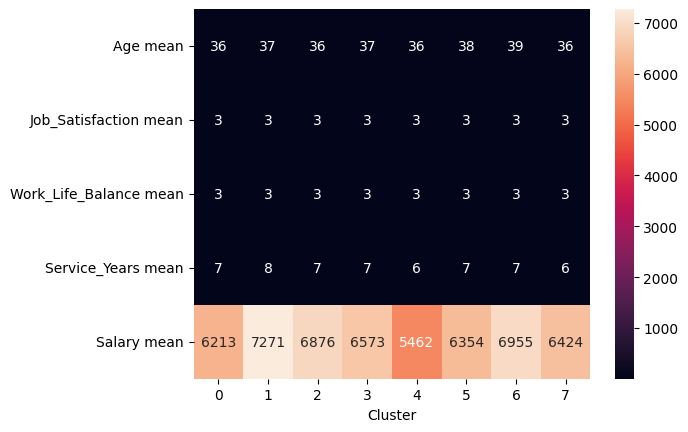

In [178]:
features_plotted = ['Age mean', 'Job_Satisfaction mean', 'Work_Life_Balance mean', 'Service_Years mean', 'Salary mean']
sns.heatmap(cluster_analysis[features_plotted].T, annot=True, fmt=".0f")

In [183]:
g = plotCardinality_magnitude(cluster_analysis)
g.show()

**Generally a higher cluster cardinality tends to result in a higher cluster magnitude, which intuitively makes sense.** 

we can Find anomalous clusters by plotting magnitude against cardinality.By looking for clusters that stray far away from bestfit line

We can also use this information to check if number of k is optimal, if many clusters deviate far from

##### Observations
when k=8 we can see that the clusters fit pretty nicely against best fit line. cluster 3 might potententially be an anamalous cluster 

In [32]:
def plotTSNE(df_cluster_labelled,n_clusters,n_components=2,clustering=True):
    '''
    Function takes in a dataframe with cluster labels and plots the data in 2D using t-SNE
    '''
    optimal_perplexity = round(np.sqrt(kmeans_df.shape[0])) # Calculate optimal perplexity value 
    tsne = TSNE(n_components=n_components, learning_rate='auto', init='random', perplexity=optimal_perplexity)
    df_without_cluster = df_cluster_labelled.drop(['Cluster'], axis=1)
    tsne_results = tsne.fit_transform(df_without_cluster)
    display(df_without_cluster)
    # plotly 
    if clustering:
        fig = px.scatter(x=tsne_results[:,0], y=tsne_results[:,1], color=df_cluster_labelled['Cluster'])
        fig.update_layout(title="TSNE plot of k = {} ".format(n_clusters))
    else:
        fig = px.scatter(x=tsne_results[:,0], y=tsne_results[:,1]) # dont color points by cluster
        fig.update_layout(title="TSNE plot of k = {} ".format(n_clusters))
    return fig 


In [33]:
kmeans_df['Cluster'] = cluster_labels
fig = plotTSNE(kmeans_df,n_clusters =8, n_components=2,clustering=True)
fig.show()

Age  BusinessTravel  Distance  Education  Job_Satisfaction  \
0     0.547619             1.0  0.000000       0.25          1.000000   
1     0.738095             0.5  0.513192       0.00          0.333333   
2     0.452381             1.0  0.423517       0.25          0.666667   
3     0.357143             0.5  0.453217       0.75          0.666667   
4     0.214286             1.0  0.423517       0.00          0.333333   
...        ...             ...       ...        ...               ...   
1465  0.428571             0.5  0.621026       0.25          1.000000   
1466  0.500000             1.0  0.487903       0.00          0.000000   
1467  0.214286             1.0  0.466520       0.50          0.333333   
1468  0.738095             0.5  0.423517       0.50          0.333333   
1469  0.380952             1.0  0.513192       0.50          0.666667   

        Salary  Performance_Rating  Work_Life_Balance  Service_Years  \
0     0.529609                 0.0           0.000000       0.512948   
1     0.505671                 1.0           0.666667       0.578150   
2     0.338805                 0.0           0.666667       0.000000   
3     0.434863                 0.0           0.666667       0.541819   
4     0.454264                 0.0           0.666667       0.415288   
...        ...                 ...                ...            ...   
1465  0.408309                 0.0           0.666667       0.490696   
1466  0.583717                 0.0           0.666667       0.526889   
1467  0.532074                 1.0           0.666667       0.512948   
1468  0.514597                 0.0           0.333333       0.557117   
1469  0.482665                 0.0           1.000000       0.464719   

      Gender_Male  Job Function_Research & Development  Job Function_Sales  \
0               0                                    0                   1   
1               1                                    1                   0   
2               1                                    1                   0   
3               0                                    1                   0   
4               1                                    1                   0   
...           ...                                  ...                 ...   
1465            1                                    1                   0   
1466            1                                    1                   0   
1467            1                                    1                   0   
1468            1                                    0                   1   
1469            1                                    1                   0   

      MaritalStatus_Married  MaritalStatus_Single  Resign Status_Yes  
0                         0                     1                  1  
1                         1                     0                  0  
2                         0                     1                  1  
3                         1                     0                  0  
4                         1                     0                  0  
...                     ...                   ...                ...  
1465                      1                     0                  0  
1466                      1                     0                  0  
1467                      1                     0                  0  
1468                      1                     0                  0  
1469                      1                     0                  0  

[1470 rows x 15 columns]

##

# Determine the best possible value of k.

There isn't a definitive set of rules to automatically extract the optimal number of K clusters. In most cases the better way of choosing the number of clusters is to ask 

> "For what purpose are we using K-means"


From there think about what is the optimal number of clusters to serve our purpose. For our problem statement, our ultimate goal is to find out "*Which group of employee is the most vulnerable for resignation*". From my human intution, I can currently only logically determin 5-10 different types of Employees that would share similar needs for each cluster. However, this 5-10 range is completely ambigious from my own intuition. 

Therefore, we would require a more systemtic method of choosing optimal number of K

We will discuss methods in the following few code blocks



## Using t-SNE to eye power clusters

### t-SNE

We will be utilizing t-Distributed Stochastic Neighbor Embedding (t-SNE) to help us visualize our high dimensinal dataset in two diemnsions.

The reason why I choose TSNE over PCA to visualize high dimensionality, is that TSNE preserves only small pairwise distances or local similarities whereas PCA is concerned with preserving large pairwise distances to maximize variance. Furthermore, PCA is a linear dimension reduction technique which would lead to poor visualization especially when dealing with non-linear relationships.

To illustrate, here's a side by side comparism between PCA and t-SNE on the MNIST dataset

![PCA-VS-t-SNE](../Images/PCA-vs-TSNE.png)

[References:Towards Data Science (An introduction to t-SNE)](https://towardsdatascience.com/an-introduction-to-t-sne-with-python-example-5a3a293108d1)

One key parameter of t-SNE is the perplexity 

The optimal perplexity can be calculated from the number of cells according to the simple power law Perplexity ~ N^(1/2)

In [ ]:
def plotTSNE(df_cluster_labelled,n_clusters,n_components=2,clustering=True):
    '''
    Function takes in a dataframe with cluster labels and plots the data in 2D using t-SNE
    '''
    optimal_perplexity = round(np.sqrt(kmeans_df.shape[0])) # Calculate optimal perplexity value 
    tsne = TSNE(n_components=n_components, learning_rate='auto', init='random', perplexity=optimal_perplexity)
    df_without_cluster = df_cluster_labelled.drop(['Cluster'], axis=1)
    tsne_results = tsne.fit_transform(df_without_cluster)
    display(df_without_cluster)
    # plotly 
    if clustering:
        fig = px.scatter(x=tsne_results[:,0], y=tsne_results[:,1], color=df_cluster_labelled['Cluster'])
        fig.update_layout(title="TSNE plot of k = {} ".format(n_clusters))
    else:
        fig = px.scatter(x=tsne_results[:,0], y=tsne_results[:,1]) # dont color points by cluster
        fig.update_layout(title="TSNE plot of k = {} ".format(n_clusters))
    return fig 


In [239]:
optimal_perplexity = round(np.sqrt(kmeans_df.shape[0]))
tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=optimal_perplexity)
tsne_results = tsne.fit_transform(kmeans_df) # Fit t-SNE to scaled data ( without cluster labels )

fig = px.scatter(x=tsne_results[:,0], y=tsne_results[:,1])
fig.update_layout(title="TSNE plot of scaled dataset")
fig.show()

**Observations:**

* Generally, clusters formed are not very distinct, however still able to roughly locate a few distict clusters

* Presense of a few outlier datapoints

Conclusions:

Unable to accuratly see clear n_number of clusters

### Visual Methods for choosing K

There are a visual methods that can aid us in choosing No.K which includes:

*   Elbow Method

Following the Elbow plot, we will be making use of of the **Silhouette Clustering to validate the number of k** chosen by the elbow plot for  clustering models.

## Elbow Plot 

To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the inertia start decreasing in a linear fashion.

$$ \text{Inertia} = \sum^m_{i=1}||x^{(i)}-\mu_{c^{(i)}}||^2_2 $$

- $m$ : Number of Datapoints
- $x^{(i)}$ : i-th Datapoints
- $\mu_{c^{(i)}}$ : Cluster Centroids for i-th Datapoints

> Inertia Measure the Sum of Squared Distance of each datapoints to its assigned cluster centroids.

However, I personally do not believe that using our human intuition to "Eyeball" where the elbow is to be optimal. Hence I'll be using **Kneed** package to compute the optimal elbow automatically.

In [192]:
k_range = np.arange(2,12,1) # Max 12 clusters
  
k_results = pd.DataFrame(columns=['k','inertia','silhouette_score'])

for idx, k in enumerate(k_range):
    k_means_range_df =  df_scaled_only.copy() # Reset k_means_range_df to original dataframe to assign cluster labels
    inertia , cluster_labels, cluster_centers, kmeans,sqdist = kmeanMetrics_result(n_cluster=k, X=k_means_range_df) # n_cluster set to sklearn default value of 8
    k_means_range_df['Cluster'] = cluster_labels
    k_means_range_df['sqdist'] = sqdist
    # output results (k,inertia and silhouette_score) to dataframe for plotting
    k_results.loc[idx] = [k,inertia,silhouette_score(k_means_range_df, cluster_labels)] 


However, I personally do not believe that using our human intuition to "Eyeball" where the elbow is to be optimal. Hence I'll be using **Kneed** package to compute the optimal elbow automatically.

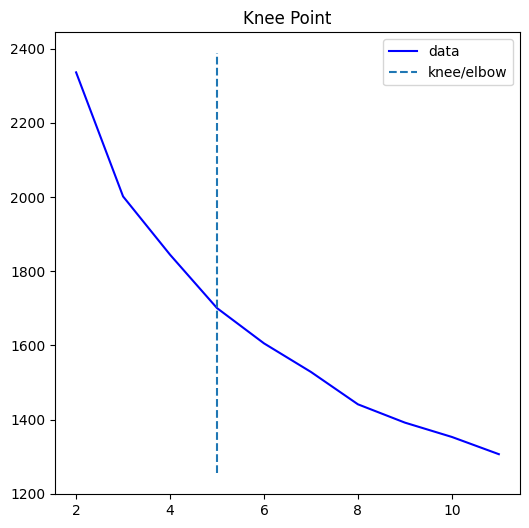

In [193]:
from kneed import KneeLocator

kl = KneeLocator(k_results['k'], k_results['inertia'], curve="convex",direction="decreasing")
kl.plot_knee()

Observations:

* Elbow plot has a gradual gradient slope down
* Kneed package automatically computed k=5 to be optimal number of clusters

Conclusion:

Since, there isn't a clear "Elbow" we will attempt to use Silhouette plot with range close to k=5 

k values to attempt = [3,4,5,6,7,8]

## Silhouette Clustering for validating clustering models

Silhouette  clustering is a method used to quantify/validate how well a clustering 

There is two components that are calculated in Silhouette clustering

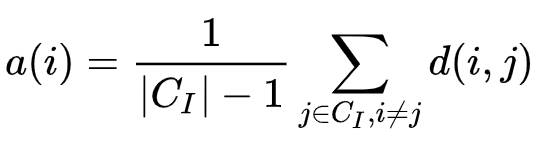

Where 
data point i in the cluster {C_{I}}C_{I}

- $a^{(i)}$ : Average Distance to other datapoints of the Assigned Cluster Centroids

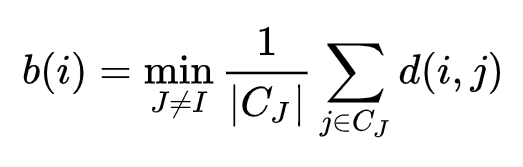

- $b^{(i)}$ : Average Distance to Nearest Cluster Centroids

If cluster model is good, **b(i) > a(i)** .

The output from Silhouette cluster ranges from -1 to 1, the closer the silhouette score is to 1, the better the model

In [196]:
figures = []
range_n_clusters = [3, 4, 5, 6,7,8]
'''
Reference: https://chart-studio.plotly.com/~Diksha_Gabha/2853.embed
'''
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig = make_subplots(rows=1, cols=2,
                              print_grid=False,
                              subplot_titles=('The silhouette plot for the various clusters.',
                                              'The visualization of the clustered data.'))

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    fig['layout']['xaxis1'].update(title='The silhouette coefficient values',
                                   range=[-0.1, 1])
   
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    fig['layout']['yaxis1'].update(title='Cluster label',
                                   showticklabels=False,
                                   range=[0, len(kmeans_df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.

    df_deskewd_scaled_cluster = df_deskewd_scaled.copy() # Reset k_means_range_df to original dataframe to assign cluster labels
    inertia , cluster_labels, cluster_centers, kmeans, sqdist = kmeanMetrics_result(n_cluster=n_clusters, X=df_deskewd_scaled)
    df_deskewd_scaled_cluster['Cluster'] = cluster_labels
    # df_deskewd_scaled_cluster['sqdist'] = sqdist
    # clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    # cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_deskewd_scaled, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_deskewd_scaled_cluster, cluster_labels)
    y_lower = 10
    
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        cmap = cm.get_cmap("Spectral")
        colors = cmap(cluster_labels.astype(float) / n_clusters)
        # colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
        
        filled_area = go.Scatter(y=np.arange(y_lower, y_upper),
                                 x=ith_cluster_silhouette_values,
                                 mode='lines',
                                 showlegend=False,
                                 line=dict(width=0.5
                                          ),
                                 fill='tozerox')
        fig.append_trace(filled_area, 1, 1)
        
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
        

    # The vertical line for average silhouette score of all the values
    axis_line = go.Scatter(x=[silhouette_avg],
                           y=[0, 10],
                           showlegend=False,
                           mode='lines',
                           line=dict(color="red", dash='dash',
                                     width =1) )

    fig.append_trace(axis_line, 1, 1)
    
    # # 2nd Plot showing the actual clusters formed
    # colors = matplotlib.colors.colorConverter.to_rgb(cm.spectral(float(i) / n_clusters))
    # colors = 'rgb'+str(colors)
    # clusters = go.Scatter(x=kmeans_df[:, 0], 
    #                       y=kmeans_df[:, 1], 
    #                       showlegend=False,
    #                       mode='markers',
    #                       marker=dict(color=colors,
    #                                  size=4)
    #                      )
    
    # fig.append_trace(clusters, 1, 2)
    
    # # Labeling the clusters
    # centers_ = cluster_centers
    # # Draw white circles at cluster centers
    # centers = go.Scatter(x=centers_[:, 0], 
    #                      y=centers_[:, 1],
    #                      showlegend=False,
    #                      mode='markers',
    #                      marker=dict(color='green', size=10,
    #                                  line=dict(color='black',
    #                                                          width=1))
    #                     )
    tsne = plotTSNE(df_deskewd_scaled_cluster,n_clusters =n_clusters, n_components=2,clustering=True)
    tsne.show()
    # fig.append_trace(tsne, 1, 2)
    
    fig['layout']['xaxis2'].update(title='Feature space for the 1st feature',
                                   zeroline=False)
    fig['layout']['yaxis2'].update(title='Feature space for the 2nd feature',
                                  zeroline=False)
                              

    fig['layout'].update(title="Silhouette analysis for KMeans clustering on sample data "
                         "with n_clusters = %d" % n_clusters)
    fig.show()
    figures.append(fig)


For n_clusters = 3 The average silhouette_score is : 0.20043714413581903


Age  BusinessTravel  Distance  Education  Job_Satisfaction  \
0     0.547619             1.0  0.000000       0.25          1.000000   
1     0.738095             0.5  0.513192       0.00          0.333333   
2     0.452381             1.0  0.423517       0.25          0.666667   
3     0.357143             0.5  0.453217       0.75          0.666667   
4     0.214286             1.0  0.423517       0.00          0.333333   
...        ...             ...       ...        ...               ...   
1465  0.428571             0.5  0.621026       0.25          1.000000   
1466  0.500000             1.0  0.487903       0.00          0.000000   
1467  0.214286             1.0  0.466520       0.50          0.333333   
1468  0.738095             0.5  0.423517       0.50          0.333333   
1469  0.380952             1.0  0.513192       0.50          0.666667   

        Salary  Performance_Rating  Work_Life_Balance  Service_Years  \
0     0.529609                 0.0           0.000000       0.512948   
1     0.505671                 1.0           0.666667       0.578150   
2     0.338805                 0.0           0.666667       0.000000   
3     0.434863                 0.0           0.666667       0.541819   
4     0.454264                 0.0           0.666667       0.415288   
...        ...                 ...                ...            ...   
1465  0.408309                 0.0           0.666667       0.490696   
1466  0.583717                 0.0           0.666667       0.526889   
1467  0.532074                 1.0           0.666667       0.512948   
1468  0.514597                 0.0           0.333333       0.557117   
1469  0.482665                 0.0           1.000000       0.464719   

      Gender_Male  Job Function_Research & Development  Job Function_Sales  \
0               0                                    0                   1   
1               1                                    1                   0   
2               1                                    1                   0   
3               0                                    1                   0   
4               1                                    1                   0   
...           ...                                  ...                 ...   
1465            1                                    1                   0   
1466            1                                    1                   0   
1467            1                                    1                   0   
1468            1                                    0                   1   
1469            1                                    1                   0   

      MaritalStatus_Married  MaritalStatus_Single  Resign Status_Yes  
0                         0                     1                  1  
1                         1                     0                  0  
2                         0                     1                  1  
3                         1                     0                  0  
4                         1                     0                  0  
...                     ...                   ...                ...  
1465                      1                     0                  0  
1466                      1                     0                  0  
1467                      1                     0                  0  
1468                      1                     0                  0  
1469                      1                     0                  0  

[1470 rows x 15 columns]

For n_clusters = 4 The average silhouette_score is : 0.21290723883497664


Age  BusinessTravel  Distance  Education  Job_Satisfaction  \
0     0.547619             1.0  0.000000       0.25          1.000000   
1     0.738095             0.5  0.513192       0.00          0.333333   
2     0.452381             1.0  0.423517       0.25          0.666667   
3     0.357143             0.5  0.453217       0.75          0.666667   
4     0.214286             1.0  0.423517       0.00          0.333333   
...        ...             ...       ...        ...               ...   
1465  0.428571             0.5  0.621026       0.25          1.000000   
1466  0.500000             1.0  0.487903       0.00          0.000000   
1467  0.214286             1.0  0.466520       0.50          0.333333   
1468  0.738095             0.5  0.423517       0.50          0.333333   
1469  0.380952             1.0  0.513192       0.50          0.666667   

        Salary  Performance_Rating  Work_Life_Balance  Service_Years  \
0     0.529609                 0.0           0.000000       0.512948   
1     0.505671                 1.0           0.666667       0.578150   
2     0.338805                 0.0           0.666667       0.000000   
3     0.434863                 0.0           0.666667       0.541819   
4     0.454264                 0.0           0.666667       0.415288   
...        ...                 ...                ...            ...   
1465  0.408309                 0.0           0.666667       0.490696   
1466  0.583717                 0.0           0.666667       0.526889   
1467  0.532074                 1.0           0.666667       0.512948   
1468  0.514597                 0.0           0.333333       0.557117   
1469  0.482665                 0.0           1.000000       0.464719   

      Gender_Male  Job Function_Research & Development  Job Function_Sales  \
0               0                                    0                   1   
1               1                                    1                   0   
2               1                                    1                   0   
3               0                                    1                   0   
4               1                                    1                   0   
...           ...                                  ...                 ...   
1465            1                                    1                   0   
1466            1                                    1                   0   
1467            1                                    1                   0   
1468            1                                    0                   1   
1469            1                                    1                   0   

      MaritalStatus_Married  MaritalStatus_Single  Resign Status_Yes  
0                         0                     1                  1  
1                         1                     0                  0  
2                         0                     1                  1  
3                         1                     0                  0  
4                         1                     0                  0  
...                     ...                   ...                ...  
1465                      1                     0                  0  
1466                      1                     0                  0  
1467                      1                     0                  0  
1468                      1                     0                  0  
1469                      1                     0                  0  

[1470 rows x 15 columns]

For n_clusters = 5 The average silhouette_score is : 0.2055567397497118


Age  BusinessTravel  Distance  Education  Job_Satisfaction  \
0     0.547619             1.0  0.000000       0.25          1.000000   
1     0.738095             0.5  0.513192       0.00          0.333333   
2     0.452381             1.0  0.423517       0.25          0.666667   
3     0.357143             0.5  0.453217       0.75          0.666667   
4     0.214286             1.0  0.423517       0.00          0.333333   
...        ...             ...       ...        ...               ...   
1465  0.428571             0.5  0.621026       0.25          1.000000   
1466  0.500000             1.0  0.487903       0.00          0.000000   
1467  0.214286             1.0  0.466520       0.50          0.333333   
1468  0.738095             0.5  0.423517       0.50          0.333333   
1469  0.380952             1.0  0.513192       0.50          0.666667   

        Salary  Performance_Rating  Work_Life_Balance  Service_Years  \
0     0.529609                 0.0           0.000000       0.512948   
1     0.505671                 1.0           0.666667       0.578150   
2     0.338805                 0.0           0.666667       0.000000   
3     0.434863                 0.0           0.666667       0.541819   
4     0.454264                 0.0           0.666667       0.415288   
...        ...                 ...                ...            ...   
1465  0.408309                 0.0           0.666667       0.490696   
1466  0.583717                 0.0           0.666667       0.526889   
1467  0.532074                 1.0           0.666667       0.512948   
1468  0.514597                 0.0           0.333333       0.557117   
1469  0.482665                 0.0           1.000000       0.464719   

      Gender_Male  Job Function_Research & Development  Job Function_Sales  \
0               0                                    0                   1   
1               1                                    1                   0   
2               1                                    1                   0   
3               0                                    1                   0   
4               1                                    1                   0   
...           ...                                  ...                 ...   
1465            1                                    1                   0   
1466            1                                    1                   0   
1467            1                                    1                   0   
1468            1                                    0                   1   
1469            1                                    1                   0   

      MaritalStatus_Married  MaritalStatus_Single  Resign Status_Yes  
0                         0                     1                  1  
1                         1                     0                  0  
2                         0                     1                  1  
3                         1                     0                  0  
4                         1                     0                  0  
...                     ...                   ...                ...  
1465                      1                     0                  0  
1466                      1                     0                  0  
1467                      1                     0                  0  
1468                      1                     0                  0  
1469                      1                     0                  0  

[1470 rows x 15 columns]

For n_clusters = 6 The average silhouette_score is : 0.20432618556825746


Age  BusinessTravel  Distance  Education  Job_Satisfaction  \
0     0.547619             1.0  0.000000       0.25          1.000000   
1     0.738095             0.5  0.513192       0.00          0.333333   
2     0.452381             1.0  0.423517       0.25          0.666667   
3     0.357143             0.5  0.453217       0.75          0.666667   
4     0.214286             1.0  0.423517       0.00          0.333333   
...        ...             ...       ...        ...               ...   
1465  0.428571             0.5  0.621026       0.25          1.000000   
1466  0.500000             1.0  0.487903       0.00          0.000000   
1467  0.214286             1.0  0.466520       0.50          0.333333   
1468  0.738095             0.5  0.423517       0.50          0.333333   
1469  0.380952             1.0  0.513192       0.50          0.666667   

        Salary  Performance_Rating  Work_Life_Balance  Service_Years  \
0     0.529609                 0.0           0.000000       0.512948   
1     0.505671                 1.0           0.666667       0.578150   
2     0.338805                 0.0           0.666667       0.000000   
3     0.434863                 0.0           0.666667       0.541819   
4     0.454264                 0.0           0.666667       0.415288   
...        ...                 ...                ...            ...   
1465  0.408309                 0.0           0.666667       0.490696   
1466  0.583717                 0.0           0.666667       0.526889   
1467  0.532074                 1.0           0.666667       0.512948   
1468  0.514597                 0.0           0.333333       0.557117   
1469  0.482665                 0.0           1.000000       0.464719   

      Gender_Male  Job Function_Research & Development  Job Function_Sales  \
0               0                                    0                   1   
1               1                                    1                   0   
2               1                                    1                   0   
3               0                                    1                   0   
4               1                                    1                   0   
...           ...                                  ...                 ...   
1465            1                                    1                   0   
1466            1                                    1                   0   
1467            1                                    1                   0   
1468            1                                    0                   1   
1469            1                                    1                   0   

      MaritalStatus_Married  MaritalStatus_Single  Resign Status_Yes  
0                         0                     1                  1  
1                         1                     0                  0  
2                         0                     1                  1  
3                         1                     0                  0  
4                         1                     0                  0  
...                     ...                   ...                ...  
1465                      1                     0                  0  
1466                      1                     0                  0  
1467                      1                     0                  0  
1468                      1                     0                  0  
1469                      1                     0                  0  

[1470 rows x 15 columns]

For n_clusters = 7 The average silhouette_score is : 0.198422287050548


Age  BusinessTravel  Distance  Education  Job_Satisfaction  \
0     0.547619             1.0  0.000000       0.25          1.000000   
1     0.738095             0.5  0.513192       0.00          0.333333   
2     0.452381             1.0  0.423517       0.25          0.666667   
3     0.357143             0.5  0.453217       0.75          0.666667   
4     0.214286             1.0  0.423517       0.00          0.333333   
...        ...             ...       ...        ...               ...   
1465  0.428571             0.5  0.621026       0.25          1.000000   
1466  0.500000             1.0  0.487903       0.00          0.000000   
1467  0.214286             1.0  0.466520       0.50          0.333333   
1468  0.738095             0.5  0.423517       0.50          0.333333   
1469  0.380952             1.0  0.513192       0.50          0.666667   

        Salary  Performance_Rating  Work_Life_Balance  Service_Years  \
0     0.529609                 0.0           0.000000       0.512948   
1     0.505671                 1.0           0.666667       0.578150   
2     0.338805                 0.0           0.666667       0.000000   
3     0.434863                 0.0           0.666667       0.541819   
4     0.454264                 0.0           0.666667       0.415288   
...        ...                 ...                ...            ...   
1465  0.408309                 0.0           0.666667       0.490696   
1466  0.583717                 0.0           0.666667       0.526889   
1467  0.532074                 1.0           0.666667       0.512948   
1468  0.514597                 0.0           0.333333       0.557117   
1469  0.482665                 0.0           1.000000       0.464719   

      Gender_Male  Job Function_Research & Development  Job Function_Sales  \
0               0                                    0                   1   
1               1                                    1                   0   
2               1                                    1                   0   
3               0                                    1                   0   
4               1                                    1                   0   
...           ...                                  ...                 ...   
1465            1                                    1                   0   
1466            1                                    1                   0   
1467            1                                    1                   0   
1468            1                                    0                   1   
1469            1                                    1                   0   

      MaritalStatus_Married  MaritalStatus_Single  Resign Status_Yes  
0                         0                     1                  1  
1                         1                     0                  0  
2                         0                     1                  1  
3                         1                     0                  0  
4                         1                     0                  0  
...                     ...                   ...                ...  
1465                      1                     0                  0  
1466                      1                     0                  0  
1467                      1                     0                  0  
1468                      1                     0                  0  
1469                      1                     0                  0  

[1470 rows x 15 columns]

For n_clusters = 8 The average silhouette_score is : 0.21587099726119682


Age  BusinessTravel  Distance  Education  Job_Satisfaction  \
0     0.547619             1.0  0.000000       0.25          1.000000   
1     0.738095             0.5  0.513192       0.00          0.333333   
2     0.452381             1.0  0.423517       0.25          0.666667   
3     0.357143             0.5  0.453217       0.75          0.666667   
4     0.214286             1.0  0.423517       0.00          0.333333   
...        ...             ...       ...        ...               ...   
1465  0.428571             0.5  0.621026       0.25          1.000000   
1466  0.500000             1.0  0.487903       0.00          0.000000   
1467  0.214286             1.0  0.466520       0.50          0.333333   
1468  0.738095             0.5  0.423517       0.50          0.333333   
1469  0.380952             1.0  0.513192       0.50          0.666667   

        Salary  Performance_Rating  Work_Life_Balance  Service_Years  \
0     0.529609                 0.0           0.000000       0.512948   
1     0.505671                 1.0           0.666667       0.578150   
2     0.338805                 0.0           0.666667       0.000000   
3     0.434863                 0.0           0.666667       0.541819   
4     0.454264                 0.0           0.666667       0.415288   
...        ...                 ...                ...            ...   
1465  0.408309                 0.0           0.666667       0.490696   
1466  0.583717                 0.0           0.666667       0.526889   
1467  0.532074                 1.0           0.666667       0.512948   
1468  0.514597                 0.0           0.333333       0.557117   
1469  0.482665                 0.0           1.000000       0.464719   

      Gender_Male  Job Function_Research & Development  Job Function_Sales  \
0               0                                    0                   1   
1               1                                    1                   0   
2               1                                    1                   0   
3               0                                    1                   0   
4               1                                    1                   0   
...           ...                                  ...                 ...   
1465            1                                    1                   0   
1466            1                                    1                   0   
1467            1                                    1                   0   
1468            1                                    0                   1   
1469            1                                    1                   0   

      MaritalStatus_Married  MaritalStatus_Single  Resign Status_Yes  
0                         0                     1                  1  
1                         1                     0                  0  
2                         0                     1                  1  
3                         1                     0                  0  
4                         1                     0                  0  
...                     ...                   ...                ...  
1465                      1                     0                  0  
1466                      1                     0                  0  
1467                      1                     0                  0  
1468                      1                     0                  0  
1469                      1                     0                  0  

[1470 rows x 15 columns]

Observations:

* No Negative silhourtte coefficient for each cluster across k-range [3-8]
* when k=4 and k=5 , looking at t-SNE plot there are presense of outlier datapoint incorrectly labeled 
* Looking at silhourtte plot, when k=7 there is presense of wide fluctuations in the size of the silhouette plots , cluster 4 and cluster 2 is significanly smaller in size compared to other clusters. A similar obervation is seen when k=4

Conclusion:

k=6 and k=5 seems to be the optimal k-values. Further Analysis needed to confirm choice

## Checking k values with cluster vs magnitude plot

In [197]:
# When k = 6
# Using deskewed + normalized data
kmeans_df = df_deskewd_scaled.copy()
df_raw_cluster = df_raw.copy() # Unscaled data for interpretation
inertia , cluster_labels, cluster_centers, kmeans ,sqdist = kmeanMetrics_result(n_cluster=6, X=kmeans_df) # n_cluster set to sklearn default value of 8
df_raw_cluster['Cluster'] = cluster_labels
df_raw_cluster['sqdist'] = sqdist 
# display(df_raw_cluster)
cluster_analysis= cluster_results(df_raw_cluster,details=True)
g = plotCardinality_magnitude(cluster_analysis)
g.show()

In [200]:
# When k = 5
# Using deskewed + normalized data
kmeans_df = df_deskewd_scaled.copy()
df_raw_cluster = df_raw.copy() # Unscaled data for interpretation
inertia , cluster_labels, cluster_centers, kmeans ,sqdist = kmeanMetrics_result(n_cluster=5, X=kmeans_df) # n_cluster set to sklearn default value of 8
df_raw_cluster['Cluster'] = cluster_labels
df_raw_cluster['sqdist'] = sqdist 
# display(df_raw_cluster)
cluster_analysis= cluster_results(df_raw_cluster,details=True)
g = plotCardinality_magnitude(cluster_analysis)
g.show()

## Refit K-means with optimal k No. of clusters = 6

* Use Min_max dataset without quartile transform

In [322]:
kmeans_optimal_clusters = df_scaled_only.copy()

inertia , cluster_labels, cluster_centers, kmeans ,sqdist= kmeanMetrics_result(n_cluster=6, X=kmeans_optimal_clusters)
kmeans_optimal_clusters['Cluster'] = cluster_labels
kmeans_optimal_clusters['sqdist'] = sqdist
final_cluster_results = cluster_results(kmeans_optimal_clusters,details=True)


In [323]:
def calculateRelativeDifferences(results):
    # Extract all column names from results dataframe
    column_names = results.columns.values
    # Create a new dataframe to store the relative differences
    relative_differences = pd.DataFrame(columns=column_names+ ['Relative Difference'])
    # Iterate through all the columns in the results dataframe
    for column in column_names:
        for index in range(len(results)):
            # Calculate the relative difference between the current value and the mean value
            relative_differences.loc[index, column+'Relative Difference'] = (results.loc[index, column]-results.loc[:, column].mean())*100 / results.loc[:, column].mean()
    return relative_differences    

In [165]:
final_cluster_results

Age mean  BusinessTravel mean  Distance mean  Education mean  \
Cluster                                                                 
0        0.487242             0.835849       0.297574        0.483962   
1        0.438735             0.770149       0.276013        0.453731   
2        0.464739             0.816609       0.300667        0.484429   
3        0.459785             0.809187       0.305654        0.481449   
4        0.410448             0.805970       0.288113        0.498134   
5        0.407375             0.786585       0.285279        0.486280   

         Job_Satisfaction mean  Salary mean  Performance_Rating mean  \
Cluster                                                                
0                     0.527044     0.308647                 0.169811   
1                     0.589055     0.261667                 0.161194   
2                     0.589389     0.281470                 0.162630   
3                     0.588928     0.332910                 0.141343   
4                     0.584577     0.258642                 0.141791   
5                     0.577236     0.278136                 0.128049   

         Work_Life_Balance mean  Service_Years mean  Gender_Male mean  \
Cluster                                                                 
0                      0.568553            0.186509          0.000000   
1                      0.576119            0.162537          1.000000   
2                      0.584775            0.173097          1.000000   
3                      0.604240            0.193286          0.568905   
4                      0.592040            0.167164          0.000000   
5                      0.609756            0.161890          0.591463   

         Job Function_Research & Development mean  Job Function_Sales mean  \
Cluster                                                                      
0                                        0.943396                 0.000000   
1                                        0.943284                 0.000000   
2                                        0.920415                 0.000000   
3                                        0.000000                 1.000000   
4                                        0.962687                 0.000000   
5                                        0.000000                 0.993902   

         MaritalStatus_Married mean  MaritalStatus_Single mean  \
Cluster                                                          
0                          0.671698                   0.000000   
1                          0.000000                   0.543284   
2                          1.000000                   0.000000   
3                          0.727915                   0.000000   
4                          0.000000                   1.000000   
5                          0.000000                   0.939024   

         Resign Status_Yes mean  sqdist mean  Cluster Size (% of Total) mean  \
Cluster                                                                        
0                      0.105660    16.718189                       18.027211   
1                      0.182090    16.537015                       22.789116   
2                      0.117647    17.001938                       19.659864   
3                      0.102473    19.837138                       19.251701   
4                      0.156716    16.881045                        9.115646   
5                      0.390244    21.074817                       11.156463   

         Cardinality mean   sqdist  
Cluster                             
0                     265  4430.32  
1                     335  5539.90  
2                     289  4913.56  
3                     283  5613.91  
4                     134  2262.06  
5                     164  3456.27

#### Function to plot cardinality vs sqdist

In [173]:
def plotCardinality_magnitude(df):
    # plot cardinality against sqdist hue = index
    fig = px.scatter(df, x='Cardinality mean', y='sqdist', color=df.index,trendline="ols")
    # plot best fit straight line 
    # increase the size of the points
    fig.update_traces(marker=dict(size=10))
    # title
    fig.update_layout(title="Cardinality vs Magnitude")
    return fig
g = plotCardinality_magnitude(final_cluster_results)
g.show()

In [166]:
relative_differences = calculateRelativeDifferences(final_cluster_results)
display(relative_differences)

Age meanRelative Difference BusinessTravel meanRelative Difference  \
0                    9.561331                               3.953781   
1                   -1.345923                              -4.217243   
2                    4.501332                               1.560912   
3                    3.387325                                0.63788   
4                   -7.706578                               0.237769   
5                   -8.397487                              -2.173099   

  Distance meanRelative Difference Education meanRelative Difference  \
0                         1.833402                          0.546655   
1                        -5.545141                         -5.734037   
2                         2.891933                          0.643637   
3                         4.598333                          0.024457   
4                        -1.404305                          3.491004   
5                        -2.374222                          1.028283   

  Job_Satisfaction meanRelative Difference Salary meanRelative Difference  \
0                                 -8.50535                       7.575554   
1                                 2.259685                      -8.798991   
2                                 2.317662                      -1.896858   
3                                 2.237711                      16.032133   
4                                 1.482373                      -9.853075   
5                                 0.207919                      -3.058762   

  Performance_Rating meanRelative Difference  \
0                                  12.604775   
1                                   6.890503   
2                                   7.842559   
3                                  -6.273214   
4                                  -5.975947   
5                                 -15.088676   

  Work_Life_Balance meanRelative Difference  \
0                                  -3.51192   
1                                 -2.227919   
2                                  -0.75898   
3                                   2.54442   
4                                    0.4739   
5                                  3.480498   

  Service_Years meanRelative Difference Gender_Male meanRelative Difference  \
0                              7.139632                              -100.0   
1                             -6.631062                           89.851308   
2                             -0.565156                           89.851308   
3                              11.03253                            8.007281   
4                             -3.973176                              -100.0   
5                             -7.002768                           12.290103   

  Job Function_Research & Development meanRelative Difference  \
0                                          50.151334            
1                                          50.133405            
2                                          46.493668            
3                                             -100.0            
4                                          53.221593            
5                                             -100.0            

  Job Function_Sales meanRelative Difference  \
0                                     -100.0   
1                                     -100.0   
2                                     -100.0   
3                                 200.917431   
4                                     -100.0   
5                                 199.082569   

  MaritalStatus_Married meanRelative Difference  \
0                                     67.951589   
1                                        -100.0   
2                                    150.040287   
3                                     82.008124   
4                                        -100.0   
5                                        -100.0   

  MaritalStatus_Single meanRelative Difference  \
0                             

# Interpretating k-means



* Relative differences to the average value plot on a radar chart
 * Describe charateristic 
 
[Reference:](https://towardsdatascience.com/the-easiest-way-to-interpret-clustering-result-8137e488a127)

In [324]:
def interpret_cluster(df):
    categorical_features = df.select_dtypes(include=['object']).columns
    numeric_features = df.select_dtypes(exclude=['object']).columns
    #plotly create subplot 3 col per row
    fig = make_subplots(rows=1, cols=5)

    for idx, column in enumerate(categorical_features):
        if column == 'Cluster':
            continue
        fig.add_trace(go.Bar(x=df[column].unique(), y=df[column].value_counts().values, name=column), row=1, col=idx+1)
        # add title to each subplot
        fig.update_layout(title_text=column)
        fig.update_layout(title=f"Cluster: {df['Cluster'].values[0]}")
    fig.show()
    display(df[numeric_features].describe())

In [135]:
##interpret the results of the clustering algorithm
def cluster_breakown_analysis(df_raw_with_clusters):
    
    results = cluster_results(df_raw_with_clusters,details=True,df_raw=True)
    # Plot cardinality of each cluster plotly
    fig = px.bar(results, y='Cardinality mean')
    # add title
    fig.update_layout(title='Cardinality of each cluster')
    fig.show()
    return results

lol = cluster_breakown_analysis(kmeans_optimal_clusters)


In [46]:
# Plot multiple radar charts to show the relative differences between the clusters
import plotly.graph_objects as go
fig = go.Figure()

for i in range(len(relative_differences)):
    fig.add_trace(go.Scatterpolar(
        # get the relative differences for the current cluster
        r=relative_differences.iloc[i, :-1].values,
        theta=relative_differences.columns[:-1],
        fill='toself',
        name="Cluster: {}".format(relative_differences.index[i])
    ))
fig.show()


# k-prototypes

k-prototypes is somewhat mixture of k-means and k-modes. The important thing to note is k-prototypes algorithm can **handle both numerical and categorical features simultaneously**

Categorical features do not need to be processed at all, instead you have explicitly specify which features are categorical

### Data preprocessing for k-prototypes

since we dont need to one hot encode all the categorical features, I'll decided to only scale all the numeric features to range [0-1] using MinMaxScaler

In [292]:
df_raw2 = df_raw.copy()

In [293]:
df_k_prototypes = df_raw.copy()

numeric_features = df_k_prototypes.select_dtypes(include=['int64', 'float64','int32']).columns
min_max_scaler = MinMaxScaler()

df_k_prototypes[numeric_features] = min_max_scaler.fit_transform(df_deskewd[numeric_features])
df_k_prototypes.head()

Age  Gender     BusinessTravel            Job Function  Distance  \
0  0.547619  Female      Travel_Rarely                   Sales  0.000000   
1  0.738095    Male  Travel_Frequently  Research & Development  0.513192   
2  0.452381    Male      Travel_Rarely  Research & Development  0.423517   
3  0.357143  Female  Travel_Frequently  Research & Development  0.453217   
4  0.214286    Male      Travel_Rarely  Research & Development  0.423517   

   Education  Job_Satisfaction MaritalStatus    Salary  Performance_Rating  \
0       0.25          1.000000        Single  0.529609                 0.0   
1       0.00          0.333333       Married  0.505671                 1.0   
2       0.25          0.666667        Single  0.338805                 0.0   
3       0.75          0.666667       Married  0.434863                 0.0   
4       0.00          0.333333       Married  0.454264                 0.0   

   Work_Life_Balance  Service_Years Resign Status  
0           0.000000       0.512948           Yes  
1           0.666667       0.578150            No  
2           0.666667       0.000000           Yes  
3           0.666667       0.541819            No  
4           0.666667       0.415288            No

#### Initiate k-prototype

In [294]:
from kmodes.kprototypes import KPrototypes

categorical_index = df_k_prototypes.select_dtypes(include=['object']).columns
model_kprototype = KPrototypes(n_clusters=6, init='Huang',random_state=0)

cluster_labels = model_kprototype.fit_predict(df_k_prototypes, categorical = [1,2,3,7,12])

df_raw2['Cluster'] = cluster_labels
# k_prototypes_results = cluster_results(df_k_prototypes,details=True)

#### Drop values not correlated to Resign Status, and doesn't bring meaning 

In [218]:
df_raw2_dropped = df_raw2.drop(['Gender','Performance_Rating','Education'], axis=1)
# one hot encode  
df_raw2_dropped_encoded = pd.get_dummies(df_raw2_dropped)
df_raw2_dropped_encoded = df_raw2_dropped_encoded.drop(['Resign Status_No','MaritalStatus_Divorced','MaritalStatus_Single','BusinessTravel_Non-Travel','BusinessTravel_Travel_Rarely'], axis=1)
df_raw2_dropped_encoded.head()

Age  Distance  Job_Satisfaction  Salary  Work_Life_Balance  Service_Years  \
0   41         1                 4    5993                  1              6   
1   49         8                 2    5130                  3             10   
2   37         2                 3    2090                  3              0   
3   33         3                 3    2909                  3              8   
4   27         2                 2    3468                  3              2   

   Cluster  BusinessTravel_Travel_Frequently  Job Function_Human Resources  \
0        0                                 0                             0   
1        2                                 1                             0   
2        1                                 0                             0   
3        0                                 1                             0   
4        3                                 0                             0   

   Job Function_Research & Development  Job Function_Sales  \
0                                    0                   1   
1                                    1                   0   
2                                    1                   0   
3                                    1                   0   
4                                    1                   0   

   MaritalStatus_Married  Resign Status_Yes  
0                      0                  1  
1                      1                  0  
2                      0                  1  
3                      1                  0  
4                      1                  0

In [219]:
df_raw2_dropped_encoded_clusted = cluster_results(df_raw2_dropped_encoded,details=True,magnitude=False) # Group by cluster and calcualte mean
df_raw2_dropped_encoded_clusted.head()

Age mean  Distance mean  Job_Satisfaction mean  Salary mean  \
Cluster                                                                 
0        39.882736       9.345277               3.413681  7205.429967   
1        32.675768       8.713311               3.590444  4941.604096   
2        37.252747       8.857143               1.472527  5985.406593   
3        36.191601       9.228346               1.377953  6422.173228   
4        39.228137       9.053232               2.920152  7701.764259   

         Work_Life_Balance mean  Service_Years mean  \
Cluster                                               
0                      2.462541            7.840391   
1                      2.839590            5.412969   
2                      2.890110            6.648352   
3                      2.721785            6.916010   
4                      3.076046            7.904943   

         BusinessTravel_Travel_Frequently mean  \
Cluster                                          
0                                     0.175896   
1                                     0.215017   
2                                     0.219780   
3                                     0.162730   
4                                     0.197719   

         Job Function_Human Resources mean  \
Cluster                                      
0                                 0.039088   
1                                 0.027304   
2                                 0.032967   
3                                 0.044619   
4                                 0.064639   

         Job Function_Research & Development mean  Job Function_Sales mean  \
Cluster                                                                      
0                                        0.791531                 0.169381   
1                                        0.784983                 0.187713   
2                                        0.714286                 0.252747   
3                                        0.703412                 0.251969   
4                                        0.243346                 0.692015   

         MaritalStatus_Married mean  Resign Status_Yes mean  \
Cluster                                                       
0                          0.657980                0.104235   
1                          0.194539                0.194539   
2                          0.516484                0.263736   
3                          0.343832                0.209974   
4                          0.673004                0.117871   

         Cluster Size (% of Total) mean  Cardinality mean  
Cluster                                                    
0                             20.884354               307  
1                             19.931973               293  
2                              6.190476                91  
3                             25.918367               381  
4                             17.891156               263

In [220]:
# RelativeDifferences is relative differences (in percentage) of each feature per cluster to the overall average per feature.
relative_differences_df_raw2_dropped_encoded_clusted = calculateRelativeDifferences(df_raw2_dropped_encoded_clusted)
relative_differences_df_raw2_dropped_encoded_clusted

Age meanRelative Difference Distance meanRelative Difference  \
0                    7.790519                         1.068645   
1                  -11.687655                        -5.766035   
2                    0.682484                        -4.210497   
3                   -2.185461                        -0.195951   
4                    6.021342                        -2.089805   
5                   -0.621229                        11.193645   

  Job_Satisfaction meanRelative Difference Salary meanRelative Difference  \
0                                25.196561                      11.448025   
1                                31.679331                     -23.567085   
2                               -45.995133                      -7.422354   
3                               -49.463656                      -0.666785   
4                                 7.096422                       19.12494   
5                                31.486476                       1.083259   

  Work_Life_Balance meanRelative Difference  \
0                                -11.374517   
1                                  2.195295   
2                                  4.013462   
3                                 -2.044466   
4                                 10.705186   
5                                  -3.49496   

  Service_Years meanRelative Difference  \
0                             11.856446   
1                            -22.774832   
2                             -5.150011   
3                             -1.331405   
4                             12.777391   
5                              4.622412   

  BusinessTravel_Travel_Frequently meanRelative Difference  \
0                                           -9.31135         
1                                          10.858879         
2                                          13.314675         
3                                         -16.099555         
4                                           1.940122         
5                                           -0.70277         

  Job Function_Human Resources meanRelative Difference  \
0                                          -7.323795     
1                                         -35.263721     
2                                         -21.836278     
3                                           5.791144     
4                                          53.256373     
5                                           5.376277     

  Job Function_Research & Development meanRelative Difference  \
0                                          21.411881            
1                                           20.40749            
2                                           9.563337            
3                                           7.895444            
4                                         -62.673479            
5                                           3.395327            

  Job Function_Sales meanRelative Difference  \
0                                 -44.625792   
1                                 -38.632613   
2                                 -17.371664   
3                                 -17.626254   
4                                  126.23417   
5                                  -7.977847   

  MaritalStatus_Married meanRelative Difference  \
0                                     39.853207   
1                                    -58.650842   
2                                      9.778149   
3                                    -26.918785   
4                                     43.046407   
5                                     -7.108136   

  Resign Status_Yes meanRelative Difference  \
0                                 -36.61312   
1                                 18.302796   
2                                 60.382737   
3                                 27.688794   
4                                -28.320706   
5                                  -41.4405   

  Cluster Size (% of Total) meanRelative Dif

In [315]:

# plot Resign Status_Yes meanRelative Difference bar chart for all clusters
fig = px.bar(relative_differences_df_raw2_dropped_encoded_clusted, x='Resign Status_Yes meanRelative Difference', y=relative_differences_df_raw2_dropped_encoded_clusted.index,color =relative_differences_df_raw2_dropped_encoded_clusted.index)
fig.update_layout(title='Resign Status Relative Difference')
# Change y-axis title
fig.update_yaxes(title_text='Cluster')
fig.show()

Observations:

From this plot, we can see that Cluster 3 (index 2) has the highest % of people who Resigned relative to all other 5 clusters by 60% more then the mean

Conclusion:

Interpret cluster 3 results

In [257]:
# plot radar chart for all index 2 
fig = go.Figure()
fig.add_trace(go.Scatterpolar(
    r = relative_differences_df_raw2_dropped_encoded_clusted.iloc[2, :-1].values,
    theta = relative_differences_df_raw2_dropped_encoded_clusted.columns[:-1],
    fill='toself',
    name="Cluster: {}".format(relative_differences_df_raw2_dropped_encoded_clusted.index[2])
))

In [297]:
df_raw2_cluster_1 = df_raw2.loc[df_raw2['Cluster'] == 1]
df_raw2_cluster_2 = df_raw2.loc[df_raw2['Cluster'] == 2]
df_raw2_cluster_3 = df_raw2.loc[df_raw2['Cluster'] == 3]
df_raw2_cluster_4 = df_raw2.loc[df_raw2['Cluster'] == 4]
df_raw2_cluster_5 = df_raw2.loc[df_raw2['Cluster'] == 5]


In [325]:
interpret_cluster(df_raw2_cluster_1)

Age    Distance   Education  Job_Satisfaction        Salary  \
count  293.000000  293.000000  293.000000        293.000000    293.000000   
mean    32.675768    8.713311    2.392491          3.590444   4941.604096   
std      8.107201    7.477802    0.985969          0.492593   3738.174320   
min     18.000000    1.000000    1.000000          3.000000   1009.000000   
25%     27.000000    2.000000    2.000000          3.000000   2642.000000   
50%     32.000000    7.000000    2.000000          4.000000   3894.000000   
75%     38.000000   13.000000    3.000000          4.000000   5666.000000   
max     58.000000   29.000000    5.000000          4.000000  19626.000000   

       Performance_Rating  Work_Life_Balance  Service_Years  Cluster  
count               293.0         293.000000     293.000000    293.0  
mean                  3.0           2.839590       5.412969      1.0  
std                   0.0           0.650239       4.734394      0.0  
min                   3.0           1.000000       0.000000      1.0  
25%                   3.0           3.000000       2.000000      1.0  
50%                   3.0           3.000000       4.000000      1.0  
75%                   3.0           3.000000       8.000000      1.0  
max                   3.0           4.000000      22.000000      1.0

In [308]:
interpret_cluster(df_raw2_cluster_2)

Age   Distance  Education  Job_Satisfaction        Salary  \
count  91.000000  91.000000  91.000000         91.000000     91.000000   
mean   37.252747   8.857143   2.879121          1.472527   5985.406593   
std     9.391004   7.725242   0.952601          0.502011   4610.795164   
min    19.000000   1.000000   1.000000          1.000000   1052.000000   
25%    31.000000   2.000000   2.000000          1.000000   2705.000000   
50%    36.000000   8.000000   3.000000          1.000000   4393.000000   
75%    42.500000  12.000000   3.000000          2.000000   7360.000000   
max    59.000000  28.000000   5.000000          2.000000  19847.000000   

       Performance_Rating  Work_Life_Balance  Service_Years  Cluster  
count                91.0          91.000000      91.000000     91.0  
mean                  4.0           2.890110       6.648352      2.0  
std                   0.0           0.674134       5.926164      0.0  
min                   4.0           1.000000       0.000000      2.0  
25%                   4.0           3.000000       3.000000      2.0  
50%                   4.0           3.000000       5.000000      2.0  
75%                   4.0           3.000000       9.000000      2.0  
max                   4.0           4.000000      29.000000      2.0

In [309]:
interpret_cluster(df_raw2_cluster_3)

Age    Distance   Education  Job_Satisfaction        Salary  \
count  381.000000  381.000000  381.000000        381.000000    381.000000   
mean    36.191601    9.228346    2.879265          1.377953   6422.173228   
std      9.016215    8.097617    0.995313          0.485513   4697.716772   
min     18.000000    1.000000    1.000000          1.000000   1091.000000   
25%     29.000000    2.000000    2.000000          1.000000   2867.000000   
50%     35.000000    7.000000    3.000000          1.000000   4774.000000   
75%     42.000000   13.000000    4.000000          2.000000   8376.000000   
max     60.000000   29.000000    5.000000          2.000000  19943.000000   

       Performance_Rating  Work_Life_Balance  Service_Years  Cluster  
count               381.0         381.000000     381.000000    381.0  
mean                  3.0           2.721785       6.916010      3.0  
std                   0.0           0.704327       6.120998      0.0  
min                   3.0           1.000000       0.000000      3.0  
25%                   3.0           2.000000       3.000000      3.0  
50%                   3.0           3.000000       5.000000      3.0  
75%                   3.0           3.000000       9.000000      3.0  
max                   3.0           4.000000      36.000000      3.0

In [310]:
interpret_cluster(df_raw2_cluster_4)

Age    Distance   Education  Job_Satisfaction        Salary  \
count  263.000000  263.000000  263.000000        263.000000    263.000000   
mean    39.228137    9.053232    3.300380          2.920152   7701.764259   
std      8.691558    8.016028    0.902224          0.707979   4697.228648   
min     24.000000    1.000000    1.000000          1.000000   1281.000000   
25%     32.000000    2.000000    3.000000          2.000000   4452.500000   
50%     38.000000    7.000000    3.000000          3.000000   6397.000000   
75%     46.000000   13.000000    4.000000          3.000000   9719.000000   
max     60.000000   29.000000    5.000000          4.000000  19999.000000   

       Performance_Rating  Work_Life_Balance  Service_Years  Cluster  
count               263.0         263.000000     263.000000    263.0  
mean                  3.0           3.076046       7.904943      4.0  
std                   0.0           0.625413       6.981607      0.0  
min                   3.0           1.000000       0.000000      4.0  
25%                   3.0           3.000000       3.000000      4.0  
50%                   3.0           3.000000       7.000000      4.0  
75%                   3.0           3.000000      10.000000      4.0  
max                   3.0           4.000000      37.000000      4.0

In [311]:
interpret_cluster(df_raw2_cluster_5)

Age    Distance   Education  Job_Satisfaction        Salary  \
count  135.000000  135.000000  135.000000        135.000000    135.000000   
mean    36.770370   10.281481    2.837037          3.585185   6535.318519   
std      9.348909    9.274143    1.140878          0.494525   4719.880552   
min     19.000000    1.000000    1.000000          3.000000   1102.000000   
25%     30.000000    2.000000    2.000000          3.000000   2788.500000   
50%     35.000000    7.000000    3.000000          4.000000   4999.000000   
75%     43.000000   19.500000    4.000000          4.000000   8814.500000   
max     60.000000   29.000000    5.000000          4.000000  19973.000000   

       Performance_Rating  Work_Life_Balance  Service_Years  Cluster  
count               135.0         135.000000     135.000000    135.0  
mean                  4.0           2.681481       7.333333      5.0  
std                   0.0           0.729464       5.722436      0.0  
min                   4.0           1.000000       0.000000      5.0  
25%                   4.0           2.000000       3.000000      5.0  
50%                   4.0           3.000000       6.000000      5.0  
75%                   4.0           3.000000      10.000000      5.0  
max                   4.0           4.000000      36.000000      5.0

## Interpretation

| Cluster | Proportion of Sample| Description |
|---|---|---|
| 1  | 6.2% | Most likely Married,Low Job sastisfaction,Rarely Travels,High middle income |
| 2 | 20.0% | Most likely Married,Travels Frequently,Middle income range|
| 3 | 20.1% | Mostly Resigned, Low income,No life partner,Rarely travels| 
| 4  | 25.9% | High income earners,Work on Sales,Relatively older |
| 5  | 17.9% |Middle income, No life partner ( mostly Divorced )|



## Plot t-SNE k-prototype

In [321]:
df_k_prototypes = df_raw2_dropped_encoded.copy()

numeric_features = df_k_prototypes.select_dtypes(include=['int64', 'float64','int32']).columns
min_max_scaler = MinMaxScaler()

df_k_prototypes[numeric_features] = min_max_scaler.fit_transform(df_deskewd[numeric_features])
df_k_prototypes.head()

plotTSNE(df_k_prototypes,n_clusters=5)

Age  Distance  Job_Satisfaction    Salary  Work_Life_Balance  \
0     0.547619  0.000000          1.000000  0.529609           0.000000   
1     0.738095  0.513192          0.333333  0.505671           0.666667   
2     0.452381  0.423517          0.666667  0.338805           0.666667   
3     0.357143  0.453217          0.666667  0.434863           0.666667   
4     0.214286  0.423517          0.333333  0.454264           0.666667   
...        ...       ...               ...       ...                ...   
1465  0.428571  0.621026          1.000000  0.408309           0.666667   
1466  0.500000  0.487903          0.000000  0.583717           0.666667   
1467  0.214286  0.466520          0.333333  0.532074           0.666667   
1468  0.738095  0.423517          0.333333  0.514597           0.333333   
1469  0.380952  0.513192          0.666667  0.482665           1.000000   

      Service_Years  BusinessTravel_Travel_Frequently  \
0          0.512948                                 0   
1          0.578150                                 1   
2          0.000000                                 0   
3          0.541819                                 1   
4          0.415288                                 0   
...             ...                               ...   
1465       0.490696                                 1   
1466       0.526889                                 0   
1467       0.512948                                 0   
1468       0.557117                                 1   
1469       0.464719                                 0   

      Job Function_Human Resources  Job Function_Research & Development  \
0                                0                                    0   
1                                0                                    1   
2                                0                                    1   
3                                0                                    1   
4                                0                                    1   
...                            ...                                  ...   
1465                             0                                    1   
1466                             0                                    1   
1467                             0                                    1   
1468                             0                                    0   
1469                             0                                    1   

      Job Function_Sales  MaritalStatus_Married  Resign Status_Yes  
0                      1                      0                  1  
1                      0                      1                  0  
2                      0                      0                  1  
3                      0                      1                  0  
4                      0                      1                  0  
...                  ...                    ...                ...  
1465                   0                      1                  0  
1466                   0                      1                  0  
1467                   0                      1                  0  
1468                   1                      1                  0  
1469                   0                      1                  0  

[1470 rows x 12 columns]

# Agglomerative Hierarchical Clustering

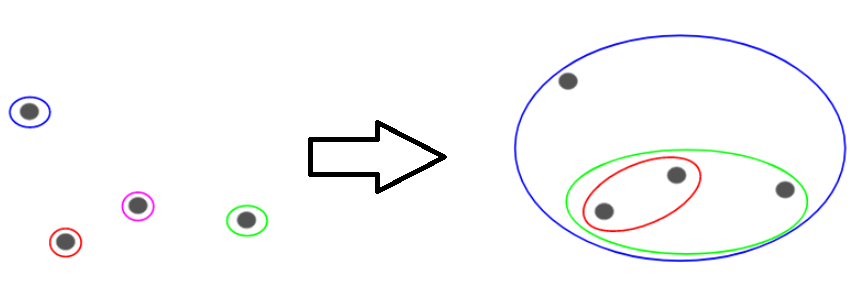

### How does it work?
assign each point to an individual cluster in this technique --> at each iteration, we merge the closest pair of clusters and repeat this step until only a single cluster is left

[Reference](https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/)

In [107]:
df_deskewd_scaled

Age  BusinessTravel  Distance  Education  Job_Satisfaction  \
0     0.547619             1.0  0.000000       0.25          1.000000   
1     0.738095             0.5  0.513192       0.00          0.333333   
2     0.452381             1.0  0.423517       0.25          0.666667   
3     0.357143             0.5  0.453217       0.75          0.666667   
4     0.214286             1.0  0.423517       0.00          0.333333   
...        ...             ...       ...        ...               ...   
1465  0.428571             0.5  0.621026       0.25          1.000000   
1466  0.500000             1.0  0.487903       0.00          0.000000   
1467  0.214286             1.0  0.466520       0.50          0.333333   
1468  0.738095             0.5  0.423517       0.50          0.333333   
1469  0.380952             1.0  0.513192       0.50          0.666667   

        Salary  Performance_Rating  Work_Life_Balance  Service_Years  \
0     0.529609                 0.0           0.000000       0.512948   
1     0.505671                 1.0           0.666667       0.578150   
2     0.338805                 0.0           0.666667       0.000000   
3     0.434863                 0.0           0.666667       0.541819   
4     0.454264                 0.0           0.666667       0.415288   
...        ...                 ...                ...            ...   
1465  0.408309                 0.0           0.666667       0.490696   
1466  0.583717                 0.0           0.666667       0.526889   
1467  0.532074                 1.0           0.666667       0.512948   
1468  0.514597                 0.0           0.333333       0.557117   
1469  0.482665                 0.0           1.000000       0.464719   

      Gender_Male  Job Function_Research & Development  Job Function_Sales  \
0               0                                    0                   1   
1               1                                    1                   0   
2               1                                    1                   0   
3               0                                    1                   0   
4               1                                    1                   0   
...           ...                                  ...                 ...   
1465            1                                    1                   0   
1466            1                                    1                   0   
1467            1                                    1                   0   
1468            1                                    0                   1   
1469            1                                    1                   0   

      MaritalStatus_Married  MaritalStatus_Single  Resign Status_Yes  
0                         0                     1                  1  
1                         1                     0                  0  
2                         0                     1                  1  
3                         1                     0                  0  
4                         1                     0                  0  
...                     ...                   ...                ...  
1465                      1                     0                  0  
1466                      1                     0                  0  
1467                      1                     0                  0  
1468                      1                     0                  0  
1469                      1                     0                  0  

[1470 rows x 15 columns]

In [110]:
h_clust = AgglomerativeClustering(compute_distances=True)
h_clust.fit(df_deskewd_scaled)

AgglomerativeClustering(compute_distances=True)

In [108]:
def plot_dendrogram(h_clust):
    '''
    AgglomerativeClustering
    Referenced from: https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html
    '''
    counts = np.zeros(h_clust.children_.shape[0])
    n_samples = len(h_clust.labels_)
    for i, merge in enumerate(h_clust.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage = np.column_stack([h_clust.children_, h_clust.distances_, counts]).astype(float)
    fig, ax = plt.subplots(figsize=(12, 12))
    dendrogram(linkage, ax=ax, truncate_mode='level', p=3)
    return fig

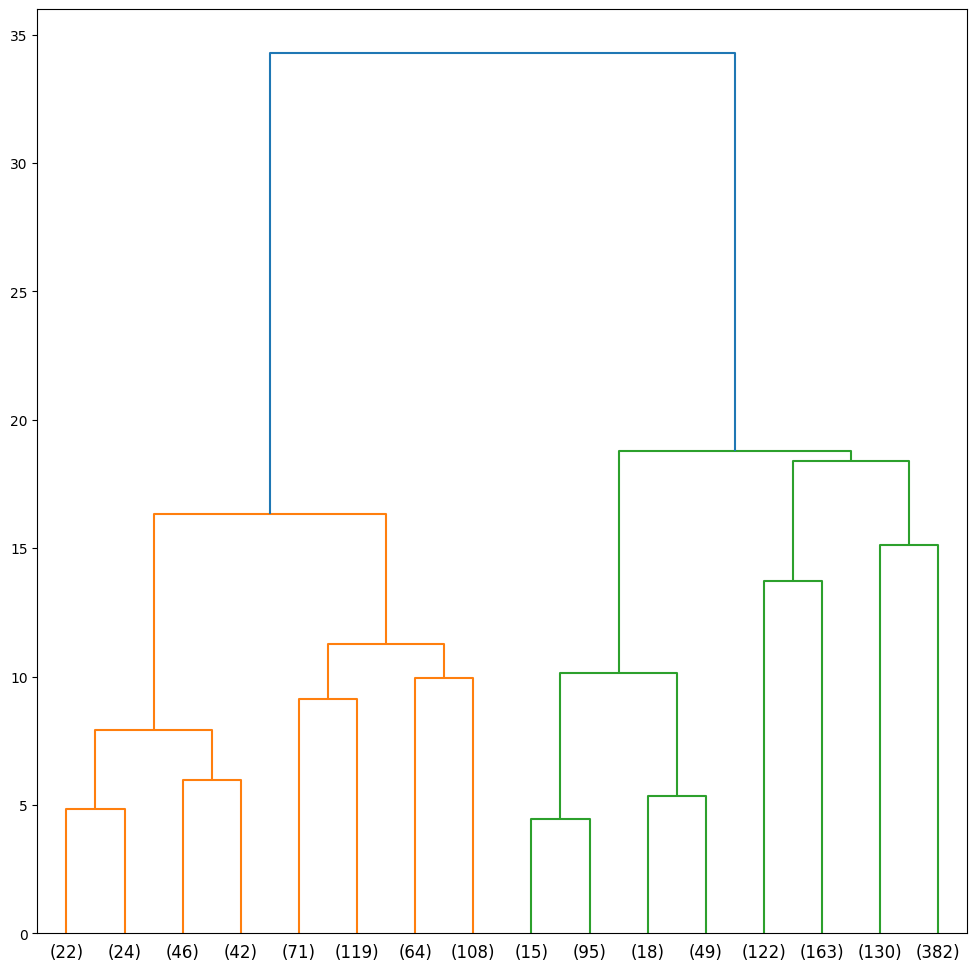

In [111]:
fig = plot_dendrogram(h_clust)

In [331]:
h_clust_df = df_raw.copy()
h_clust = AgglomerativeClustering(5)
cluster_labels = h_clust.fit_predict(df_deskewd_scaled) + 1
h_clust_df['Cluster'] = cluster_labels
h_clust_df.head()

Age  Gender     BusinessTravel            Job Function  Distance  \
0   41  Female      Travel_Rarely                   Sales         1   
1   49    Male  Travel_Frequently  Research & Development         8   
2   37    Male      Travel_Rarely  Research & Development         2   
3   33  Female  Travel_Frequently  Research & Development         3   
4   27    Male      Travel_Rarely  Research & Development         2   

   Education  Job_Satisfaction MaritalStatus  Salary  Performance_Rating  \
0          2                 4        Single    5993                   3   
1          1                 2       Married    5130                   4   
2          2                 3        Single    2090                   3   
3          4                 3       Married    2909                   3   
4          1                 2       Married    3468                   3   

   Work_Life_Balance  Service_Years Resign Status  Cluster  
0                  1              6           Yes        5  
1                  3             10            No        1  
2                  3              0           Yes        3  
3                  3              8            No        2  
4                  3              2            No        1

In [259]:
h_clust_df_cluster_1 = h_clust_df[h_clust_df['Cluster'] == 1]
h_clust_df_cluster_2 = h_clust_df[h_clust_df['Cluster'] == 2]
h_clust_df_cluster_3 = h_clust_df[h_clust_df['Cluster'] == 3]
h_clust_df_cluster_4 = h_clust_df[h_clust_df['Cluster'] == 4]
h_clust_df_cluster_5 = h_clust_df[h_clust_df['Cluster'] == 5]
h_clust_df_cluster_6 = h_clust_df[h_clust_df['Cluster'] == 6]

In [288]:
#extract cluster number from h_clust_df_cluster_3
h_clust_df_cluster_3['Cluster'].values[0]

3

In [289]:
def interpret_cluster(df):
    categorical_features = df.select_dtypes(include=['object']).columns
    numeric_features = df.select_dtypes(exclude=['object']).columns
    #plotly create subplot 3 col per row
    fig = make_subplots(rows=1, cols=5)

    for idx, column in enumerate(categorical_features):
        if column == 'Cluster':
            continue
        fig.add_trace(go.Bar(x=df[column].unique(), y=df[column].value_counts().values, name=column), row=1, col=idx+1)
        # add title to each subplot
        fig.update_layout(title_text=column)
        fig.update_layout(title=f"Cluster: {h_clust_df_cluster_3['Cluster'].values[0]}")
    fig.show()
    display(df[numeric_features].describe())

interpret_cluster(h_clust_df_cluster_3)

Age    Distance   Education  Job_Satisfaction        Salary  \
count  177.000000  177.000000  177.000000        177.000000    177.000000   
mean    34.491525    8.548023    2.807910          2.677966   4797.463277   
std      9.535292    7.817464    1.015418          1.109474   4055.810516   
min     18.000000    1.000000    1.000000          1.000000   1009.000000   
25%     28.000000    2.000000    2.000000          2.000000   2450.000000   
50%     33.000000    6.000000    3.000000          3.000000   3424.000000   
75%     40.000000   11.000000    3.000000          4.000000   5094.000000   
max     59.000000   29.000000    5.000000          4.000000  19626.000000   

       Performance_Rating  Work_Life_Balance  Service_Years  Cluster  
count          177.000000         177.000000     177.000000    177.0  
mean             3.101695           2.734463       5.451977      3.0  
std              0.303104           0.732833       5.708766      0.0  
min              3.000000           1.000000       0.000000      3.0  
25%              3.000000           2.000000       2.000000      3.0  
50%              3.000000           3.000000       4.000000      3.0  
75%              3.000000           3.000000       7.000000      3.0  
max              4.000000           4.000000      36.000000      3.0